# Soccer Stats
## by DataFlow team

Analizing data from games in la Liga Mexicana and Mexico's World Cup journey and its possible influence nationwide and in Monterrey in prices of goods like beer (which is delicious), and human behavior like in accidents, or sadly, death. 

### 1. Work with the data of the world wide games results

In [29]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [30]:
# Load CVS File 
worldwide_results = os.path.join(".", "Resources", "results.csv")

# Read the headings in the Data Frames
worldwide_results = pd.read_csv(worldwide_results)

worldwide_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [13]:
# Add a new column to identify when home team wins
# Add the calculation in 'home_win' (= home_score - away_score)
# If home_team winds, value in the cell will be 1, if not it will be 0.
home_win= worldwide_results["home_score"] > worldwide_results["away_score"]

In [14]:
# Convert the answers to vectors
worldwide_results["home_win"]  = home_win.astype(int)

In [15]:
# Display the new data frame
worldwide_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,0
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,0
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1


In [16]:
# Filter which tournament we want to analyze
FIFAworld_up = worldwide_results['tournament']=="FIFA World Cup"
print(FIFAworld_up.head())

0    False
1    False
2    False
3    False
4    False
Name: tournament, dtype: bool


In [17]:
# Filter rows for "FIFA World Cup" tournament using  the boolean variable
worldwide_resultsFIFA = worldwide_results[FIFAworld_up]
worldwide_resultsFIFA

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win
1300,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,0
1301,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1
1302,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,0
1303,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,0
1304,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1
1305,1930-07-16,Chile,Mexico,3,0,FIFA World Cup,Montevideo,Uruguay,True,1
1306,1930-07-17,Bolivia,Yugoslavia,0,4,FIFA World Cup,Montevideo,Uruguay,True,0
1307,1930-07-17,Paraguay,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,0
1309,1930-07-18,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False,1
1310,1930-07-19,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,1


In [18]:
# Identify the dates and matches where Mexico played (as home and away team)
worldwide_resultsFIFA.loc[worldwide_results.home_team == 'Mexico', 'MX play'] = 'True'
worldwide_resultsFIFA.loc[worldwide_results.away_team == 'Mexico', 'MX play'] = 'True'
worldwide_resultsFIFA 

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,MX play
1300,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,0,NaN
1301,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1,True
1302,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,0,NaN
1303,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,0,NaN
1304,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1,NaN
1305,1930-07-16,Chile,Mexico,3,0,FIFA World Cup,Montevideo,Uruguay,True,1,True
1306,1930-07-17,Bolivia,Yugoslavia,0,4,FIFA World Cup,Montevideo,Uruguay,True,0,NaN
1307,1930-07-17,Paraguay,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,0,NaN
1309,1930-07-18,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False,1,NaN
1310,1930-07-19,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,1,True


In [19]:
# Verifying column type
worldwide_resultsFIFA.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
home_win       int32
MX play       object
dtype: object

In [20]:
# Changing 'date' column to datetime format
worldwide_resultsFIFA["date"]=pd.to_datetime(worldwide_resultsFIFA["date"])

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
# Verifying change in 'date'
worldwide_resultsFIFA.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
home_win               int32
MX play               object
dtype: object

In [22]:
# Adding columns of year and week of the match
worldwide_resultsFIFA['Week']=worldwide_resultsFIFA['date'].dt.week
worldwide_resultsFIFA['Year']=worldwide_resultsFIFA['date'].dt.year

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# Verifying new columns 'Week' 'Year'
worldwide_resultsFIFA.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,MX play,Week,Year
1300,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,0,NaN,28,1930
1301,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1,True,28,1930
1302,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,0,NaN,29,1930
1303,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,0,NaN,29,1930
1304,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1,NaN,29,1930


In [27]:
# Only mantain FIFA World Cup of 2010 and 2014
worldwide_resultsFIFA_CLEAN = worldwide_resultsFIFA[(worldwide_resultsFIFA['Year'] >= 2010) & (worldwide_resultsFIFA['Year'] <= 2014)]
worldwide_resultsFIFA_CLEAN

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,MX play,Week,Year
32109,2010-06-11,South Africa,Mexico,1,1,FIFA World Cup,Johannesburg,South Africa,False,0,True,23,2010
32110,2010-06-11,Uruguay,France,0,0,FIFA World Cup,Cape Town,South Africa,True,0,NaN,23,2010
32111,2010-06-12,Argentina,Nigeria,1,0,FIFA World Cup,Johannesburg,South Africa,True,1,NaN,23,2010
32112,2010-06-12,England,United States,1,1,FIFA World Cup,Rustenburg,South Africa,True,0,NaN,23,2010
32113,2010-06-12,South Korea,Greece,2,0,FIFA World Cup,Port Elizabeth,South Africa,True,1,NaN,23,2010
32114,2010-06-13,Algeria,Slovenia,0,1,FIFA World Cup,Polokwane,South Africa,True,0,NaN,23,2010
32115,2010-06-13,Germany,Australia,4,0,FIFA World Cup,Durban,South Africa,True,1,NaN,23,2010
32116,2010-06-13,Serbia,Ghana,0,1,FIFA World Cup,Pretoria,South Africa,True,0,NaN,23,2010
32117,2010-06-14,Italy,Paraguay,1,1,FIFA World Cup,Cape Town,South Africa,True,0,NaN,24,2010
32118,2010-06-14,Japan,Cameroon,1,0,FIFA World Cup,Bloemfontein,South Africa,True,1,NaN,24,2010


In [28]:
worldwide_resultsFIFA_CLEAN = worldwide_resultsFIFA_CLEAN.to_csv("./Resources/FIFAworldcup_2010and2014.csv")

########################################

## 1. Working URGENCIAS database

This section opens the URGENCIAS database year by year. Most of files have similar structure, they differ in the type of delimiter used, the amount of columns in each file and other minor things.

NOTE: Given the size of files, each year is worked separately and then erased (files remain in ZIPs).

### ************ BEGIN - This section is run for each year separately **************************

In [2]:
import pandas as pd
import numpy as np
import os

#Opcional, ajusta la cantidad de columnas mostradas a la hora de hacer displays de la Data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Path para ubicar el archivo input
    #Customize if needed
path=os.path.join(".","Urgencias","Urgencias 2011","URGENCIAS_2011.csv")

#Abrir archivo
    ##OJO!!! Algunos archivos tienen el delimiter con comas (,), otros con punto y coma(;) y hasta con una barra (|)
defun=pd.read_csv(path,low_memory=False,delimiter=';',header=None)

print(defun.shape)
defun.sample(n=5)


(8579204, 25)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
8219196,5948229,QTSSA002131,0000988,2011-01-22 00:00:00,21,3,2,22,8,2,3.0,1,4,NaN,Z349,NaN,NaN,NaN,2011-01-22 00:00:00,9999,1,99,99,99,99
1909209,8256606,ZSSSA012853,0023636,2011-10-07 00:00:00,2,3,2,32,8,2,2.0,3,4,NaN,J029,1.0,NaN,NaN,2011-10-07 00:00:00,1,10,9,30,10,30
3406950,1129245,DFSSA018154,0007988,2011-09-07 00:00:00,32,3,2,9,8,2,3.0,3,4,NaN,O998,NaN,NaN,NaN,2011-09-07 00:00:00,0,9,23,10,23,45
2725021,456300,CSSSA018875,0000003,2011-04-07 00:00:00,20,3,2,7,9,2,2.0,2,4,NaN,Z349,NaN,NaN,NaN,2011-04-07 00:00:00,0,4,15,0,15,30
6003506,3728733,JCSSA003583,0005370,2011-10-31 00:00:00,58,3,2,14,8,1,2.0,3,2,NaN,L299,NaN,NaN,NaN,2011-10-31 00:00:00,1,11,1,10,2,0


In [3]:
#Guardar nombre de variables en strings (asi ya no hay que ir archivo por archivo viendo como se llaman las vars)
cols=defun.columns

#Estado
varestado=cols[1]

#Fech
varfecha=cols[3]

#Edad
varedad=cols[4]

#CveEdad
varcveedad=cols[5]

#Gender
varsexo=cols[6]

In [4]:
defun[varfecha]

0          2011-04-12 00:00:00
1          2011-04-12 00:00:00
2          2011-04-12 00:00:00
3          2011-04-12 00:00:00
4          2011-04-12 00:00:00
                  ...         
8579199    2011-01-10 00:00:00
8579200    2010-12-30 00:00:00
8579201    2010-12-31 00:00:00
8579202    2010-12-31 00:00:00
8579203    2010-12-31 00:00:00
Name: 3, Length: 8579204, dtype: object

In [5]:
#Generar variables de interes 

#El comando para quedarnos con substrings dentro de un string es
    #df.str.slice()
defun['Estado']=defun[varestado].str.slice(stop=2)
defun['Estado']=defun.Estado.str.upper()

defun['Fecha']=defun[varfecha].str.slice(stop=10)
defun.loc[defun['Fecha']== '2520-01-15','Fecha']='2017-01-15'

defun['Edad']=defun[varedad]
defun.loc[defun[varcveedad]<3, 'Edad'] = 0
defun.loc[defun[varcveedad]==9, 'Edad'] = np.nan
defun.loc[defun[varedad]==999, 'Edad'] = np.nan
defun.loc[defun[varedad]<0, 'Edad'] = np.nan

defun['Gender']=defun[varsexo]
defun.loc[defun[varsexo]==9,'Gender']=np.nan

In [6]:
#Quedandonos solo con las vars importantes
defun=defun.iloc[:, [25,26,27,28]]
defun['Total']=1
defun

,Estado,Fecha,Edad,Gender,Total
0,SL,2011-04-12,2.0,2.0,1
1,SL,2011-04-12,12.0,2.0,1
2,SL,2011-04-12,24.0,1.0,1
3,SL,2011-04-12,1.0,2.0,1
4,SL,2011-04-12,31.0,2.0,1
...,...,...,...,...,...
8579199,SL,2011-01-10,2.0,1.0,1
8579200,SL,2010-12-30,17.0,1.0,1
8579201,SL,2010-12-31,8.0,2.0,1
8579202,SL,2010-12-31,16.0,2.0,1


In [7]:
defun.groupby(['Edad']).count()

,Estado,Fecha,Gender,Total
Edad,,,,
0.0,469681,469681,469582,469681
1.0,332901,332901,332879,332901
2.0,253391,253391,253374,253391
3.0,197479,197479,197461,197479
4.0,163151,163151,163144,163151
5.0,134121,134121,134107,134121
6.0,121618,121618,121615,121618
7.0,106428,106428,106421,106428
8.0,100315,100315,100309,100315


In [8]:
#Creando DataFrame Total
defun_tot=defun.drop(['Edad','Gender'], axis=1)
defun_tot=defun_tot.groupby(['Estado','Fecha']).sum()

In [9]:
#Creando DataFrame by Gender
defun_temp=defun.drop(['Edad'], axis=1)

#Gender==1
defun_gender1=defun_temp.loc[(defun_temp['Gender']==1)]
defun_gender1=defun_gender1.drop(['Gender'], axis=1)
defun_gender1=defun_gender1.groupby(['Estado','Fecha']).sum()
defun_gender1=defun_gender1.rename(columns={'Total':'Gender1'})

#Gender==2
defun_gender2=defun_temp.loc[(defun_temp['Gender']==2)]
defun_gender2=defun_gender2.drop(['Gender'], axis=1)
defun_gender2=defun_gender2.groupby(['Estado','Fecha']).sum()
defun_gender2=defun_gender2.rename(columns={'Total':'Gender2'})

del defun_temp

In [10]:
#Creando DataFrame by AgeGroup
defun_temp=defun.drop(['Gender'], axis=1)

#AgeGroup between 0 and 9 yrs
defun_age1=defun_temp.loc[(defun_temp['Edad']>=0) & (defun_temp['Edad']<10)]
defun_age1=defun_age1.drop(['Edad'], axis=1)
defun_age1=defun_age1.groupby(['Estado','Fecha']).sum()
defun_age1=defun_age1.rename(columns={'Total':'Age1'})

#AgeGroup between 10 and 19 yrs
defun_age2=defun_temp.loc[(defun_temp['Edad']>=10) & (defun_temp['Edad']<20)]
defun_age2=defun_age2.drop(['Edad'], axis=1)
defun_age2=defun_age2.groupby(['Estado','Fecha']).sum()
defun_age2=defun_age2.rename(columns={'Total':'Age2'})

#AgeGroup between 20 and 29 yrs
defun_age3=defun_temp.loc[(defun_temp['Edad']>=20) & (defun_temp['Edad']<30)]
defun_age3=defun_age3.drop(['Edad'], axis=1)
defun_age3=defun_age3.groupby(['Estado','Fecha']).sum()
defun_age3=defun_age3.rename(columns={'Total':'Age3'})

#AgeGroup between 30 and 39 yrs
defun_age4=defun_temp.loc[(defun_temp['Edad']>=30) & (defun_temp['Edad']<40)]
defun_age4=defun_age4.drop(['Edad'], axis=1)
defun_age4=defun_age4.groupby(['Estado','Fecha']).sum()
defun_age4=defun_age4.rename(columns={'Total':'Age4'})

#AgeGroup between 40 and 49 yrs
defun_age5=defun_temp.loc[(defun_temp['Edad']>=40) & (defun_temp['Edad']<50)]
defun_age5=defun_age5.drop(['Edad'], axis=1)
defun_age5=defun_age5.groupby(['Estado','Fecha']).sum()
defun_age5=defun_age5.rename(columns={'Total':'Age5'})

#AgeGroup between 50 and 59 yrs
defun_age6=defun_temp.loc[(defun_temp['Edad']>=50) & (defun_temp['Edad']<60)]
defun_age6=defun_age6.drop(['Edad'], axis=1)
defun_age6=defun_age6.groupby(['Estado','Fecha']).sum()
defun_age6=defun_age6.rename(columns={'Total':'Age6'})

#AgeGroup between 60 and 69 yrs
defun_age7=defun_temp.loc[(defun_temp['Edad']>=60) & (defun_temp['Edad']<70)]
defun_age7=defun_age7.drop(['Edad'], axis=1)
defun_age7=defun_age7.groupby(['Estado','Fecha']).sum()
defun_age7=defun_age7.rename(columns={'Total':'Age7'})

#AgeGroup 70+
defun_age8=defun_temp.loc[(defun_temp['Edad']>=70)]
defun_age8=defun_age8.drop(['Edad'], axis=1)
defun_age8=defun_age8.groupby(['Estado','Fecha']).sum()
defun_age8=defun_age8.rename(columns={'Total':'Age8'})

del defun_temp

In [11]:
#Merge all DataFrames :D!!!

defun_final=pd.merge(defun_tot,defun_gender1,on=['Estado','Fecha'],how='outer')
defun_final=pd.merge(defun_final,defun_gender2,on=['Estado','Fecha'],how='outer')
defun_final=pd.merge(defun_final,defun_age1,on=['Estado','Fecha'],how='outer')
defun_final=pd.merge(defun_final,defun_age2,on=['Estado','Fecha'],how='outer')
defun_final=pd.merge(defun_final,defun_age3,on=['Estado','Fecha'],how='outer')
defun_final=pd.merge(defun_final,defun_age4,on=['Estado','Fecha'],how='outer')
defun_final=pd.merge(defun_final,defun_age5,on=['Estado','Fecha'],how='outer')
defun_final=pd.merge(defun_final,defun_age6,on=['Estado','Fecha'],how='outer')
defun_final=pd.merge(defun_final,defun_age7,on=['Estado','Fecha'],how='outer')
defun_final=pd.merge(defun_final,defun_age8,on=['Estado','Fecha'],how='outer')

defun_final=defun_final.fillna(0)
defun_final['Gender1']=defun_final['Gender1'].astype('int64')
defun_final['Gender2']=defun_final['Gender2'].astype('int64')
defun_final['Age1']=defun_final['Age1'].astype('int64')
defun_final['Age2']=defun_final['Age2'].astype('int64')
defun_final['Age3']=defun_final['Age3'].astype('int64')
defun_final['Age4']=defun_final['Age4'].astype('int64')
defun_final['Age5']=defun_final['Age5'].astype('int64')
defun_final['Age6']=defun_final['Age6'].astype('int64')
defun_final['Age7']=defun_final['Age7'].astype('int64')
defun_final['Age8']=defun_final['Age8'].astype('int64')

#Reset index of final DataFrame
defun_final=defun_final.reset_index(drop=False)

#Set Fecha in date format
defun_final['Fecha']=pd.to_datetime(defun_final['Fecha'],format="%Y-%m-%d")
#Create separate Year, month and day vars (just in case)
defun_final['Year']=defun_final['Fecha'].dt.year
defun_final['Month']=defun_final['Fecha'].dt.month
defun_final['Day']=defun_final['Fecha'].dt.day

#Done!
defun_final

,Estado,Fecha,Total,Gender1,Gender2,Age1,Age2,Age3,Age4,Age5,Age6,Age7,Age8,Year,Month,Day
0,AS,2010-12-26,504,180,324,145,81,131,50,36,29,17,15,2010,12,26
1,AS,2010-12-27,615,184,431,135,107,191,69,41,26,17,29,2010,12,27
2,AS,2010-12-28,449,202,247,159,67,82,62,20,27,17,15,2010,12,28
3,AS,2010-12-29,759,180,579,136,149,277,88,33,31,15,30,2010,12,29
4,AS,2010-12-30,442,203,239,146,64,57,60,33,29,21,32,2010,12,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,ZS,2011-12-21,388,118,270,105,59,88,57,22,21,12,24,2011,12,21
11649,ZS,2011-12-22,359,132,227,113,55,77,46,20,16,18,13,2011,12,22
11650,ZS,2011-12-23,411,167,244,112,61,75,52,26,24,19,42,2011,12,23
11651,ZS,2011-12-24,440,173,267,99,62,79,63,35,35,25,42,2011,12,24


In [12]:
#Counting NaN (missing) values per column
defun_final.isnull().sum(axis = 0)

Estado     0
Fecha      0
Total      0
Gender1    0
Gender2    0
Age1       0
Age2       0
Age3       0
Age4       0
Age5       0
Age6       0
Age7       0
Age8       0
Year       0
Month      0
Day        0
dtype: int64

In [13]:
#Listing types
defun_final.dtypes

Estado             object
Fecha      datetime64[ns]
Total               int64
Gender1             int64
Gender2             int64
Age1                int64
Age2                int64
Age3                int64
Age4                int64
Age5                int64
Age6                int64
Age7                int64
Age8                int64
Year                int64
Month               int64
Day                 int64
dtype: object

In [14]:
#Generating output
    #Customize path if needed
outpath=os.path.join(".","Urgencias","clean","URG2011.csv")
defun_final.to_csv(outpath)

### ************ END - This section is run for each year separately **************************

## 2. Merge URGENCIAS annual files.

All annual files are merged into a single one. The final output is a CSV file with amount of URGENCIAS by state, from 2008 to 2017 with daily data.

In [ ]:
path=os.path.join(".","URGENCIAS","CLEAN")

In [ ]:
#List with al periods

#Create DataFrames with a loop!!!! :)
for x in range(2008,2018,1):
    z=x
    x=str(x)
    globals()['p'+x]=pd.read_csv(path+str('/URG')+x+str('.CSV'),low_memory=False)
    globals()['p'+x]=globals()['p'+x].loc[(globals()['p'+x]['Year']==z) | (globals()['p'+x]['Year']==z-1)]
    
#Append all DataFrames with a loop!!!! :)  
for x in range(2008,2018,1):
    x=str(x)
    if x=='2008':
        Uall=globals()['p'+x]
    else:
        Uall=Uall.append(globals()['p'+x],ignore_index=True)
    del globals()['p'+x]

In [ ]:
Uall.to_csv(path+str('.Resources/URG.csv'))
Uall

################################################################

## Constructing Price Database

This Notebook works the databases and identifiers of PROFECO's Quién es Quién en los Precios Database. This database is collected at store level for approximately 50 cities. The data included here goes from 2010 to 2015.

In [1]:
import pandas as pd
import numpy as np
import os

#Opcional, ajusta la cantidad de columnas mostradas a la hora de hacer displays de la Data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Set reading path
path=os.path.join(".","Precios","PRECIOS_BASICOS")

#Set previous path (catalogues)
prepath=os.path.join(".","Precios")

### 1. Work catalogs and identifiers

In [2]:
#Read random catalogues
cade=pd.read_csv(prepath+str("/CADENAS.CSV"),low_memory=False, encoding='latin-1')
cade

,CVE_CADENA,DES_CADENA
0,3HER,ZAPATERIA 3 HERMANOS
1,7ELE,7 ELEVEN
2,A510,ALMACENES 5 10 15 (BASICOS-UTILES)
3,AANT,ABARROTES DE ANTEQUERA
4,ABAA,ABARROTES ARELLANO
...,...,...
1821,COAP,COMERCIAL DE AGUA PRIETA
1822,BARQ,PESCADERIA EL BARQUITO
1823,FJAN,FARMACIA JANA
1824,FNIM,FARMACIA NUEVA IMPERIAL


In [3]:
catego=pd.read_csv(prepath+str("/CATEGORIAS.CSV"),low_memory=False, encoding='latin-1')
catego

produ=pd.read_csv(prepath+str("/PRODUCTOS.CSV"),low_memory=False, encoding='latin-1')
produ

print(produ.shape)
produ=pd.merge(produ,catego,on='CVE_CATEGO',how='left')
print(produ.shape)
produ=produ.rename(columns={'CVE_PRODUC':'CVE_PRODUCTO',
                            'DES_PRODUC':'DES_PRODUCTO',
                            'CVE_CATEGO':'CVE_CATEGORIA',
                            'DES_CATEGO':'DES_CATEGORIA'})
del catego

catalo=pd.read_csv(prepath+str("/CATALOGOS.CSV"),low_memory=False, encoding='latin-1')
catalo=catalo.rename(columns={'GEN_CLAVE':'CVE_CATALOGO',
                       'GEN_DESCRI':'DES_CATALOGO'})

marca=pd.read_csv(prepath+str("/MARCAS.CSV"),low_memory=False, encoding='latin-1')
marca=marca.rename(columns={'CVE_PRODUC':'CVE_PRODUCTO',
                      'MARCA':'DES_MARCA',
                      'CATALOGO':'CVE_CATALOGO',
                      'PRESENTACI':'PRESENTACION'})

print(marca.shape)
df_bienes=pd.merge(produ,marca,on='CVE_PRODUCTO',how='outer')
print(df_bienes.shape)
df_bienes=pd.merge(df_bienes,catalo,on='CVE_CATALOGO',how='left')
print(df_bienes.shape)

del produ, marca, catalo
df_bienes

(1405, 3)
(1405, 4)
(26662, 7)
(26662, 10)
(26662, 11)


,CVE_PRODUCTO,CVE_CATEGORIA,DES_PRODUCTO,DES_CATEGORIA,CVE_MARCA,CODIGO_PRO,DES_MARCA,PRESENTACION,CVE_CATALOGO,ACTIVO,DES_CATALOGO
0,1,11101,HARINA DE MAIZ,TORTILLAS Y DERIVADOS DEL MAIZ,1,NaN,AGROINSA,PAQ. 1 KG.,BAS,0,BASICOS
1,1,11101,HARINA DE MAIZ,TORTILLAS Y DERIVADOS DEL MAIZ,2,7501077400050,MASECA,PAQUETE 1 KG.,BAS,1,BASICOS
2,1,11101,HARINA DE MAIZ,TORTILLAS Y DERIVADOS DEL MAIZ,3,7501586300018,MINSA,PAQUETE 1 KG. NIXTAMALIZADO,BAS,1,BASICOS
3,1,11101,HARINA DE MAIZ,TORTILLAS Y DERIVADOS DEL MAIZ,4,NaN,MARCA INSTITUCIONAL,PAQUETE 1 KG.,BAS,0,BASICOS
4,4,11101,TORTILLA DE HARINA DE TRIGO,TORTILLAS Y DERIVADOS DEL MAIZ,1,NaN,TORTILLINAS TIA ROSA,BOLSA 255 GR.,BAS,0,BASICOS
...,...,...,...,...,...,...,...,...,...,...,...
26657,1684,51156,LORATADINA AMBROXOL,MEDICAMENTOS,1,NaN,NaN,CAJA CON 10 TABLETAS 5 MG./ 30 MG.,MED,0,MEDICAMENTOS
26658,2021,51156,UNIVAL,MEDICAMENTOS,1,7501314704040,NaN,CAJA CON 40 TABLETAS DE 1 GR.,MED,1,MEDICAMENTOS
26659,2034,51156,CEFOTAXIMA,MEDICAMENTOS,1,NaN,NaN,CAJA CON FRASCO AMPULA CON POLVO Y AMPOLLETA C...,MED,1,MEDICAMENTOS
26660,2037,51156,CLOPIDOGREL,MEDICAMENTOS,1,NaN,NaN,CAJA CON 14 TABLETAS DE 75 MG.,MED,1,MEDICAMENTOS


In [4]:
#Read random catalogues

#Working establecimientos
estable=pd.read_csv(prepath+str("/ESTABLECIMIENTOS.CSV"),low_memory=False, encoding='latin-1')
estable=estable.iloc[:,[0,2,3,5,6,8,11,12,13,20,21]]
estable=estable.rename(columns={'EST_CVEEDO':'CVE_ESTADO',
                               'EST_CVEMUN':'CVE_MUNICIPIO',
                               'LATITUD':'EST_LAT',
                               'LONGITUD':'EST_LON',
                               'EST_GRUPOG':'CVE_GRUPOGIRO',
                               'EST_CVEGIR':'CVE_GIRO'})

#Working giros
grupgiros=pd.read_csv(prepath+str("/GRUPGIRO.CSV"),low_memory=False, encoding='latin-1')
grupgiros=grupgiros.rename(columns={'CVE_GRUPOG':'CVE_GRUPOGIRO','DES_GRUPOG':'DES_GRUPOGIRO'})

giros=pd.read_csv(prepath+str("/GIROS.CSV"),low_memory=False, encoding='latin-1')
giros=giros.rename(columns={'GIR_CVEGRU':'CVE_GRUPOGIRO','GIR_CLAVE':'CVE_GIRO','GIR_DESCRI':'DES_GIRO'})
giro=pd.merge(giros,grupgiros,on='CVE_GRUPOGIRO',how='outer')
#print(giro.shape)
#print(giro.isnull().sum(axis = 0))
del giros, grupgiros

#Working estados municipios y ciudades
estad=pd.read_csv(prepath+str("/ESTADOS.CSV"),low_memory=False, encoding='latin-1')
estad=estad.rename(columns={'NOMBRE_EDO':'NOM_ESTADO'})

muni=pd.read_csv(prepath+str("/MUNICIPIOS.CSV"),low_memory=False, encoding='latin-1')
muni=muni.rename(columns={'MUNICIPIO':'NOM_MUNICIPIO',
                    'CVE_MUNICI':'CVE_MUNICIPIO'})
muni.loc[(muni['CVE_ESTADO']==25) & (muni['CVE_MUNICIPIO']==11), 'CVE_CIUDAD'] = 2502
muni.loc[(muni['CVE_ESTADO']==22) & (muni['CVE_MUNICIPIO']==16), 'CVE_CIUDAD'] = 2201
muni.loc[(muni['CVE_ESTADO']==29) & (muni['CVE_MUNICIPIO']==5), 'CVE_CIUDAD'] = 2902

cd=pd.read_csv(prepath+str("/CIUDADES.CSV"),low_memory=False, encoding='latin-1')
cd=cd.rename(columns={'CIUDAD':'NOM_CIUDAD'})

geoubica=pd.merge(muni,estad,on="CVE_ESTADO",how="left")
geoubica=pd.merge(geoubica,cd,on="CVE_CIUDAD",how="left")
del estad, muni, cd

characteristics=pd.merge(estable,giro,on=['CVE_GIRO','CVE_GRUPOGIRO'],how='left')
characteristics=pd.merge(characteristics,geoubica,on=['CVE_ESTADO','CVE_MUNICIPIO'],how='left')
del estable, giro
characteristics


,EST_FOLIO,CVE_ESTADO,CVE_MUNICIPIO,CVE_GRUPOGIRO,CVE_GIRO,EST_NOMBRE,EST_DIRECC,EST_COLONI,EST_CP,EST_LAT,EST_LON,DES_GIRO,DES_GRUPOGIRO,NOM_MUNICIPIO,CVE_CIUDAD,NOM_ESTADO,RANGO_CP1,RANGO_CP2,NOM_CIUDAD
0,00001,15,104,B13,1,I.M.S.S. SUCURSAL TEQUESQUINAHUAC,"VIA DR. GUSTAVO BAZ 4351, ENTRE MORELOS Y JUA...",NaN,NaN,19.557905,-99.204076,TIENDA DE AUTOSERVICIO,GIROS VARIOS,TLALNEPANTLA,901.0,MÉXICO,50000,57999,CIUDAD DE MÉXICO
1,00002,9,15,B13,1,AURRERA SUCURSAL AEROPUERTO,"CALZ. IGNACIO ZARAGOZA 58, COL. FEDERAL, CP. 1...",NaN,NaN,0.000000,0.000000,TIENDA DE AUTOSERVICIO,GIROS VARIOS,VENUSTIANO CARRANZA,901.0,DISTRITO FEDERAL,1000,16999,CIUDAD DE MÉXICO
2,00003,15,57,B13,1,AURRERA SUCURSAL SATELITE,"CIRCUITO METALURGISTAS 2, COL. CIUDAD SATELITE...",NaN,NaN,0.000000,0.000000,TIENDA DE AUTOSERVICIO,GIROS VARIOS,NAUCALPAN,901.0,MÉXICO,50000,57999,CIUDAD DE MÉXICO
3,00004,15,33,B13,1,AURRERA BODEGA SUCURSAL PLAZA ARAGON,"CARLOS HANK GONZALEZ 120, COL. RINCONADA DE AR...",NaN,NaN,19.530151,-99.028912,TIENDA DE AUTOSERVICIO,GIROS VARIOS,ECATEPEC,901.0,MÉXICO,50000,57999,CIUDAD DE MÉXICO
4,00005,9,3,B13,1,SUMESA SUCURSAL NARVARTE,"CUAUHTEMOC S/N GLORIETA METRO ETIOPIA, COL. N...",NaN,NaN,0.000000,0.000000,TIENDA DE AUTOSERVICIO,GIROS VARIOS,BENITO JUAREZ,901.0,DISTRITO FEDERAL,1000,16999,CIUDAD DE MÉXICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,S0950,30,39,B13,1,BODEGA GIGANTE,"IGNACIO ZARAGOZA S/N., COL. CENTRO, CP. 96400",NaN,NaN,0.000000,0.000000,TIENDA DE AUTOSERVICIO,GIROS VARIOS,COATZACOALCOS,3001.0,VERACRUZ DE IGNACIO DE LA LLAVE,91000,96999,VERACRUZ
8827,S0951,30,87,B13,1,FARMACIAS PLUS,"RUIZ CORTINES NO. 3258, COL. UNIDAD MAGISTERIA...",NaN,NaN,0.000000,0.000000,TIENDA DE AUTOSERVICIO,GIROS VARIOS,XALAPA,3001.0,VERACRUZ DE IGNACIO DE LA LLAVE,91000,96999,VERACRUZ
8828,S0952,30,87,B13,1,SUPER FASTI,"JUSTO SIERRA NO. 2, COL. CENTRO",NaN,NaN,0.000000,0.000000,TIENDA DE AUTOSERVICIO,GIROS VARIOS,XALAPA,3001.0,VERACRUZ DE IGNACIO DE LA LLAVE,91000,96999,VERACRUZ
8829,S0953,23,5,B13,1,WAL MART,"COBA LOTE 2 SUPER MANZANA 21, MANZANA 2, CP. 7...",NaN,NaN,0.000000,0.000000,TIENDA DE AUTOSERVICIO,GIROS VARIOS,BENITO JUAREZ,2301.0,QUINTANA ROO,77000,77999,CANCÚN


### 2. Merge price database

This database contains the price takings, but very few info about store location/characteristics and good characteristics. It needs to be merged with the catalogs worked above.

In [5]:
#List with al periods
pers=['201001','201002','201101','201102','201201','201202','201301','201302','201401','201402','201501','201502']

#Create DataFrames with a loop!!!! :)
for x in pers:
    globals()['p'+x]=pd.read_csv(path+str('/')+x+str('.CSV'),low_memory=False)

#Append all DataFrames with a loop!!!! :)  
for x in pers:
    if x=='201001':
        pall=globals()['p'+x]
    else:
        pall=pall.append(globals()['p'+x],ignore_index=True)
    del globals()['p'+x]
    
del pers

pall=pall.rename(columns={'CVE_PRODUC':'CVE_PRODUCTO',
                         'CATALOGO':'CVE_CATALOGO',
                         'PRECIO_NOR':'PRECIO_NORMAL',
                         'PRECIO_OFE':'PRECIO_OFERTA',
                         })

In [6]:
print(pall.shape)
prices_df=pd.merge(pall,characteristics,on='EST_FOLIO',how='left')
print(prices_df.shape)
prices_df=pd.merge(prices_df,df_bienes,on=['CVE_PRODUCTO','CVE_MARCA','CVE_CATALOGO'],how='left')
print(prices_df.shape)
prices_df=pd.merge(prices_df,cade,on='CVE_CADENA',how='left')
print(prices_df.shape)
del pall, characteristics, df_bienes, cade

prices_df

(42426649, 9)
(42426649, 27)
(42426649, 35)
(42426649, 36)


,EST_FOLIO,CVE_CADENA,CVE_PRODUCTO,CVE_MARCA,PRECIO_NORMAL,FECHA_OBS,PRECIO_OFERTA,FECHA_VIG,CVE_CATALOGO,CVE_ESTADO,CVE_MUNICIPIO,CVE_GRUPOGIRO,CVE_GIRO,EST_NOMBRE,EST_DIRECC,EST_COLONI,EST_CP,EST_LAT,EST_LON,DES_GIRO,DES_GRUPOGIRO,NOM_MUNICIPIO,CVE_CIUDAD,NOM_ESTADO,RANGO_CP1,RANGO_CP2,NOM_CIUDAD,CVE_CATEGORIA,DES_PRODUCTO,DES_CATEGORIA,CODIGO_PRO,DES_MARCA,PRESENTACION,ACTIVO,DES_CATALOGO,DES_CADENA
0,00083,SUPE,9002,3,28.00,3/25/2010,0.0,NaN,BAS,15.0,104.0,B13,1.0,SUPERAMA SUCURSAL VIVEROS,"CALLE 8 NO. 1, COL. VIVEROS DEL VALLE, CP. 54060",NaN,NaN,19.531690,-99.220193,TIENDA DE AUTOSERVICIO,GIROS VARIOS,TLALNEPANTLA,901.0,MÉXICO,50000.0,57999.0,CIUDAD DE MÉXICO,75000.0,ALCAPARRA,PRODUCTOS DE TEMPORADA (NAVIDEÐOS),8410344807012,EL SERPIS,FRASCO 100 GR.,1.0,BASICOS,SUPERAMA
1,00004,BAUR,15,54,34.20,2/2/2010,0.0,NaN,BAS,15.0,33.0,B13,1.0,AURRERA BODEGA SUCURSAL PLAZA ARAGON,"CARLOS HANK GONZALEZ 120, COL. RINCONADA DE AR...",NaN,NaN,19.530151,-99.028912,TIENDA DE AUTOSERVICIO,GIROS VARIOS,ECATEPEC,901.0,MÉXICO,50000.0,57999.0,CIUDAD DE MÉXICO,11103.0,GALLETAS DULCES,GALLETAS PASTAS Y HARINAS DE TRIGO,NaN,GAMESA,CAJA 775 GR. EMPERADOR. CHOCOLATE SANDWICH,1.0,BASICOS,BODEGA AURRERA
2,11901,SORI,2756,30,52.96,2/2/2010,0.0,NaN,BAS,15.0,24.0,B13,1.0,SORIANA SUCURSAL CUAUTITLAN IZCALLI,"PONIENTE CON NORTE 4 S/N ESQ. 1RO. DE MAYO, CO...",NaN,NaN,19.663460,-99.210757,TIENDA DE AUTOSERVICIO,GIROS VARIOS,CUAUTITLAN,901.0,MÉXICO,50000.0,57999.0,CIUDAD DE MÉXICO,11901.0,RASTRILLOS DESECHABLES,ARTS. PARA EL CUIDADO PERSONAL,7591066680525,SCHICK,PAQUETE CON 5. EXACTA. PIEL SENSIBLE. ALOE VERA,1.0,BASICOS,SORIANA
3,00004,BAUR,26,9,29.90,2/2/2010,0.0,NaN,BAS,15.0,33.0,B13,1.0,AURRERA BODEGA SUCURSAL PLAZA ARAGON,"CARLOS HANK GONZALEZ 120, COL. RINCONADA DE AR...",NaN,NaN,19.530151,-99.028912,TIENDA DE AUTOSERVICIO,GIROS VARIOS,ECATEPEC,901.0,MÉXICO,50000.0,57999.0,CIUDAD DE MÉXICO,11104.0,ZUCARITAS,ARROZ Y CEREALES PREPARADOS,7501008015070,KELLOGG'S,CAJA 730 GR.,1.0,BASICOS,BODEGA AURRERA
4,11901,SORI,2801,62,139.00,2/2/2010,0.0,NaN,BAS,15.0,24.0,B13,1.0,SORIANA SUCURSAL CUAUTITLAN IZCALLI,"PONIENTE CON NORTE 4 S/N ESQ. 1RO. DE MAYO, CO...",NaN,NaN,19.663460,-99.210757,TIENDA DE AUTOSERVICIO,GIROS VARIOS,CUAUTITLAN,901.0,MÉXICO,50000.0,57999.0,CIUDAD DE MÉXICO,11902.0,PAÑALES DESECHABLES,ARTS. DE PAPEL P/HIGIENE PERSONAL,7501943434660,KLEEN BEBE,PAQUETE 40 PIEZAS. SUAVELASTIC. MAX. GRANDE,1.0,BASICOS,SORIANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42426644,23097,SSCA,858,1,15.00,7/21/2015,0.0,NaN,FRU,3.0,4.0,B01,15.0,SUPER SANTA CARMELA SUCURSAL LOS CABOS,"CARR. TRANSPENINSULAR KM 6.7, AUN LADO DEL INS...",NaN,NaN,22.905914,-109.868668,TIENDA DE CONVENIENCIA,PRODUCTOS ALIMENTICIOS Y DE CONSUMO FRECUENTE,LOS CABOS,302.0,BAJA CALIFORNIA SUR,23000.0,23999.0,LOS CABOS,11618.0,CHAYOTE,HORTALIZAS FRESCAS,NaN,NaN,1 KG. SIN ESPINAS,1.0,FRUTAS Y LEGUMBRES,SUPER SANTA CARMELA
42426645,23097,SSCA,860,4,31.00,7/21/2015,0.0,NaN,FRU,3.0,4.0,B01,15.0,SUPER SANTA CARMELA SUCURSAL LOS CABOS,"CARR. TRANSPENINSULAR KM 6.7, AUN LADO DEL INS...",NaN,NaN,22.905914,-109.868668,TIENDA DE CONVENIENCIA,PRODUCTOS ALIMENTICIOS Y DE CONSUMO FRECUENTE,LOS CABOS,302.0,BAJA CALIFORNIA SUR,23000.0,23999.0,LOS CABOS,11618.0,CHILE FRESCO,HORTALIZAS FRESCAS,NaN,NaN,1 KG. POBLANO,1.0,FRUTAS Y LEGUMBRES,SUPER SANTA CARMELA
42426646,23097,SSCA,860,5,26.00,7/21/2015,0.0,NaN,FRU,3.0,4.0,B01,15.0,SUPER SANTA CARMELA SUCURSAL LOS CABOS,"CARR. TRANSPENINSULAR KM 6.7, AUN LADO DEL INS...",NaN,NaN,22.905914,-109.868668,TIENDA DE CONVENIENCIA,PRODUCTOS ALIMENTICIOS Y DE CONSUMO FRECUENTE,LOS CABOS,302.0,BAJA CALIFORNIA SUR,23000.0,23999.0,LOS CABOS,11618.0,CHILE FRESCO,HORTALIZAS FRESCAS,NaN,NaN,1 KG. SERRANO,1.0,FRUTAS Y LEGUMBRES,SUPER SANTA CARMELA
42426647,23097,SSCA,861,4,19.00,7/21/2015,0.0,NaN,FRU,3.0,4.0,B01,15.0,SUPER SANTA CARMELA SUCURSAL LOS CABOS,"CARR. TRANSPENINSULAR

In [7]:
print(prices_df.loc[prices_df['CVE_PRODUCTO']==1001].shape)
beer=prices_df.loc[prices_df['CVE_PRODUCTO']==1001]

(588332, 36)


In [8]:
beer=beer.drop(columns=['CVE_CADENA','CVE_PRODUCTO','CVE_CATALOGO','CVE_GRUPOGIRO','CVE_GIRO','EST_COLONI','EST_CP','DES_GRUPOGIRO','RANGO_CP1','RANGO_CP2','CVE_CATEGORIA','DES_PRODUCTO','DES_CATEGORIA','CODIGO_PRO','DES_CATALOGO'])

In [9]:
outpath=os.path.join(".","Precios","BeerPrices20102015.csv")
beer.to_csv(outpath)

,EST_FOLIO,CVE_MARCA,PRECIO_NORMAL,FECHA_OBS,PRECIO_OFERTA,FECHA_VIG,CVE_ESTADO,CVE_MUNICIPIO,EST_NOMBRE,EST_DIRECC,EST_LAT,EST_LON,DES_GIRO,NOM_MUNICIPIO,CVE_CIUDAD,NOM_ESTADO,NOM_CIUDAD,DES_MARCA,PRESENTACION,ACTIVO,DES_CADENA
96,00208,11,49.2,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,VICTORIA,CANASTA O PAQUETE CON 6 BOTELLAS DE 325 ML. NO...,1.0,SUPERAMA
217,00208,28,53.0,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,CANASTA O PAQUETE CON 6 BOTELLAS DE 355 ML. NO...,1.0,SUPERAMA
218,00208,37,71.0,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,PAQUETE CON 8 LATAS DE 355 ML. C/U,1.0,SUPERAMA
278,00208,15,69.0,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,BOHEMIA. CLASICA,CANASTA CON 6 BOTELLAS DE 325 ML. NO RETORNABLE,1.0,SUPERAMA
396,00208,20,23.0,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,BOTELLA 940 ML. RETORNABLE,1.0,SUPERAMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42426072,23002,32,72.0,7/21/2015,0.0,NaN,3.0,3.0,SORIANA SUCURSAL EX-BASE AEREA,"FORJADORES DE SUDCALIFORNIA 4390, ESQ. LUIS DO...",24.125121,-110.311812,TIENDA DE AUTOSERVICIO,LA PAZ,301.0,BAJA CALIFORNIA SUR,LA PAZ,INDIO,CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE,1.0,SORIANA
42426073,23002,34,69.0,7/21/2015,0.0,NaN,3.0,3.0,SORIANA SUCURSAL EX-BASE AEREA,"FORJADORES DE SUDCALIFORNIA 4390, ESQ. LUIS DO...",24.125121,-110.311812,TIENDA DE AUTOSERVICIO,LA PAZ,301.0,BAJA CALIFORNIA SUR,LA PAZ,CORONA EXTRA,CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE,1.0,SORIANA
42426074,23002,41,28.0,7/21/2015,0.0,NaN,3.0,3.0,SORIANA SUCURSAL EX-BASE AEREA,"FORJADORES DE SUDCALIFORNIA 4390, ESQ. LUIS DO...",24.125121,-110.311812,TIENDA DE AUTOSERVICIO,LA PAZ,301.0,BAJA CALIFORNIA SUR,LA PAZ,VICTORIA,BOTELLA 1.2 LT. RETORNABLE,1.0,SORIANA
42426533,23018,32,72.0,7/21/2015,0.0,NaN,3.0,4.0,WALMART SUCURSAL LOS CABOS,"TRANSPENINSULAR SAN LUCAS - LA PAZ KM., 2 ESQ....",22.890285,-109.916942,TIENDA DE AUTOSERVICIO,LOS CABOS,302.0,BAJA CALIFORNIA SUR,LOS CABOS,INDIO,CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE,1.0,WAL-MART


In [10]:
beer.to_csv("./Resources/BeerPrices20102015.csv")

#################################################################

## Beer price inflation: Comparison across cities during the World Cup.

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, date, time
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

beer_path = os.path.join(".", "Resources", "BeerPrices20102015.csv")
beer=pd.read_csv(beer_path,low_memory=False)
beer=beer.drop(columns={'Unnamed: 0'})
beer

,EST_FOLIO,CVE_MARCA,PRECIO_NORMAL,FECHA_OBS,PRECIO_OFERTA,FECHA_VIG,CVE_ESTADO,CVE_MUNICIPIO,EST_NOMBRE,EST_DIRECC,EST_LAT,EST_LON,DES_GIRO,NOM_MUNICIPIO,CVE_CIUDAD,NOM_ESTADO,NOM_CIUDAD,DES_MARCA,PRESENTACION,ACTIVO,DES_CADENA
0,208,11,49.20,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,VICTORIA,CANASTA O PAQUETE CON 6 BOTELLAS DE 325 ML. NO...,1.0,SUPERAMA
1,208,28,53.00,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,CANASTA O PAQUETE CON 6 BOTELLAS DE 355 ML. NO...,1.0,SUPERAMA
2,208,37,71.00,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,PAQUETE CON 8 LATAS DE 355 ML. C/U,1.0,SUPERAMA
3,208,15,69.00,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,BOHEMIA. CLASICA,CANASTA CON 6 BOTELLAS DE 325 ML. NO RETORNABLE,1.0,SUPERAMA
4,208,20,23.00,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,BOTELLA 940 ML. RETORNABLE,1.0,SUPERAMA
5,208,31,23.00,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,INDIO,BOTELLA 940 ML. RETORNABLE,1.0,SUPERAMA
6,20060,32,49.00,3/26/2010,0.0,NaN,1.0,1.0,SORIANA SUCURSAL SAN MARCOS,"CONVENCION S/N, ENTRE CARLOS SAGREDO Y FUNDICI...",0.000000,0.000000,TIENDA DE AUTOSERVICIO,AGUASCALIENTES,101.0,AGUASCALIENTES,AGUASCALIENTES,INDIO,CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE,1.0,SORIANA
7,20060,34,56.50,3/26/2010,0.0,NaN,1.0,1.0,SORIANA SUCURSAL SAN MARCOS,"CONVENCION S/N, ENTRE CARLOS SAGREDO Y FUNDICI...",0.000000,0.000000,TIENDA DE AUTOSERVICIO,AGUASCALIENTES,101.0,AGUASCALIENTES,AGUASCALIENTES,CORONA EXTRA,CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE,1.0,SORIANA
8,20060,28,52.00,3/26/2010,0.0,NaN,1.0,1.0,SORIANA SUCURSAL SAN MARCOS,"CONVENCION S/N, ENTRE CARLOS SAGREDO Y FUNDICI...",0.000000,0.000000,TIENDA DE AUTOSERVICIO,AGUASCALIENTES,101.0,AGUASCALIENTES,AGUASCALIENTES,SOL,CANASTA O PAQUETE CON 6 BOTELLAS DE 355 ML. NO...,1.0,SORIANA
9,363,28,52.00,3/26/2010,0.0,NaN,9.0,1.0,AURRERA BODEGA SUCURSAL SANTA LUCIA,"SANTA LUCIA 185, ESQ. ROSA BLANCA, COL. ALFONS...",19.378523,-99.199154,TIENDA DE AUTOSERVICIO,ALVARO OBREGON,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,CANASTA O PAQUETE CON 6 BOTELLAS DE 355 ML. NO...,1.0,BODEGA AURRERA


In [2]:
#Reworking Presentación

beer['PRESENTACION']=beer['PRESENTACION'].replace({'CANASTA O PAQUETE CON 6 BOTELLAS DE 325 ML. NO RETORNABLE' : '6 Botellas 325ml',
'CANASTA O PAQUETE CON 6 BOTELLAS DE 355 ML. NO RETORNABLE' : '6 Botellas 355ml',
'PAQUETE CON 8 LATAS DE 355 ML. C/U' : '8 Latas 355ml',
'CANASTA CON 6 BOTELLAS DE 325 ML. NO RETORNABLE' : '6 Botellas 325ml',
'BOTELLA 940 ML. RETORNABLE' : 'Botella 940ml',
'CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE' : '6 Botellas 355ml',
'PAQUETE CON 8 LATAS DE 355 ML.' : '8 Latas 355ml',
'BOTELLA 940 ML. RETORNABLE. FAMILIAR' : 'Botella 940ml',
'BOTELLA 1.2 LT. RETORNABLE' : 'Botella 1.2L',
'PAQUETE CON 6 LATAS DE 355 ML.' : '6 Latas 355ml',
'CANASTA CON 6 BOTELLAS DE 325 ML.' : '6 Botellas 325ml',
'SIX PACK CON 6 LATAS DE 355 ML.' : '6 Latas 355ml',
'SIX PACK CON 6 LATAS DE 355 ML. C/U' : '6 Latas 355ml',
'PAQUETE CON 6 LATAS DE 340 ML.' : '6 Latas 340ml',
'PAQUETE CON 8 LATAS DE 340 ML.' : '8 Latas 340ml',
'PAQUETE CON 8 LATAS DE 340 ML. C/U' : '8 Latas 340ml',
'CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE (CLARA)' : '6 Botellas 355ml',
'PAQUETE CON 12 LATAS DE  355 ML.' : '12 Latas 355ml',
'PAQUETE CON 12 LATAS DE  355 ML.  C/U' : '12 Latas 355ml',
'PAQUETE CON 12 LATAS DE 355 ML. C/U' : '12 Latas 355ml'})

In [3]:
beer.groupby('PRESENTACION')['PRECIO_NORMAL'].count()

PRESENTACION
12 Latas 355ml       65368
6 Botellas 325ml    106578
6 Botellas 355ml    261302
6 Latas 340ml            9
6 Latas 355ml         4114
8 Latas 340ml         4605
8 Latas 355ml        26860
Botella 1.2L         49195
Botella 940ml        70301
Name: PRECIO_NORMAL, dtype: int64

In [4]:
#Reworking Brand

beer['DES_MARCA']=beer['DES_MARCA'].replace({'VICTORIA' : 'Victoria',
'SOL' : 'Sol',
'BOHEMIA. CLASICA' : 'Bohemia',
'INDIO' : 'Indio',
'CORONA EXTRA' : 'Corona',
'DOS EQUIS LAGER. ESPECIAL' : 'Dos Equis Lager',
'TECATE' : 'Tecate',
'CORONA' : 'Corona',
'NEGRA MODELO' : 'Negra Modelo',
'PACIFICO' : 'Pacifico',
'BARRILITO' : 'Barrilito',
'MODELO ESPECIAL' : 'Modelo Especial',
'DOS EQUIS LAGER ESPECIAL' : 'Dos Equis Lager',
'DOS EQUIS LAGER' : 'Dos Equis Lager',
'BOHEMIA.' : 'Bohemia'})

In [5]:
beer.groupby('DES_MARCA')['PRECIO_NORMAL'].count()

DES_MARCA
Barrilito          61644
Bohemia            50409
Corona             89548
Dos Equis Lager    44499
Indio              77367
Modelo Especial    16207
Negra Modelo       25005
Pacifico            2851
Sol                86894
Tecate             53998
Victoria           79910
Name: PRECIO_NORMAL, dtype: int64

In [6]:
#Reworking Brand+Presentación

beer['DES_PRODUCTOMARCA']=beer['DES_MARCA']+'-'+beer['PRESENTACION']
print(beer['DES_PRODUCTOMARCA'].unique().shape)
beer.groupby('DES_PRODUCTOMARCA')['PRECIO_NORMAL'].count()

(29,)


DES_PRODUCTOMARCA
Barrilito-6 Botellas 325ml          61644
Bohemia-6 Botellas 325ml             5720
Bohemia-6 Botellas 355ml            44689
Corona-6 Botellas 355ml             42383
Corona-Botella 940ml                47165
Dos Equis Lager-6 Botellas 325ml        2
Dos Equis Lager-6 Botellas 355ml    38505
Dos Equis Lager-6 Latas 340ml           9
Dos Equis Lager-6 Latas 355ml         369
Dos Equis Lager-8 Latas 340ml        4590
Dos Equis Lager-8 Latas 355ml        1024
Indio-6 Botellas 355ml              61319
Indio-Botella 1.2L                   8591
Indio-Botella 940ml                  7457
Modelo Especial-12 Latas 355ml      15693
Modelo Especial-6 Latas 355ml         514
Negra Modelo-6 Botellas 355ml       25005
Pacifico-6 Latas 355ml               2851
Sol-12 Latas 355ml                  10597
Sol-6 Botellas 355ml                49401
Sol-8 Latas 340ml                      15
Sol-8 Latas 355ml                   11296
Sol-Botella 940ml                   15585
Tecate-12 Latas 

In [7]:
#Fixing some prices: When PRECIO_OFERTA exists (i.e. !=0)m, use this instead of PRECIO_NORMAL

beer['PRECIO']=beer['PRECIO_NORMAL']
beer.loc[beer['PRECIO_OFERTA']!=0,'PRECIO']=beer['PRECIO_OFERTA'].astype(float)

In [8]:
#Reformat date variable to datetime, and extract week of year for later use.

beer['FECHA_OBS']=pd.to_datetime(beer['FECHA_OBS'],format="%m/%d/%Y")
beer['WeekYR']=beer['FECHA_OBS'].dt.week
beer['year']=beer['FECHA_OBS'].dt.year
beer['DayWK']=beer['FECHA_OBS'].dt.dayofweek

In [9]:
beer2=beer.drop(['FECHA_OBS','PRECIO_NORMAL','PRECIO_OFERTA','FECHA_VIG','ACTIVO','DayWK'],axis=1)

In [10]:
#Constructing IDs for each combination of Store-Marca-Presentación (i.e. each good-store). THIS IS OUR MAIN ID.

beer2=beer2.sort_values(['CVE_MARCA','PRESENTACION','EST_FOLIO'])
beer2['ID'] = (beer2.groupby(['CVE_MARCA','PRESENTACION','EST_FOLIO']).cumcount()==0).astype(int)
beer2['ID'] = beer2['ID'].cumsum()
beer2['ID'].unique()

array([   1,    2,    3, ..., 8520, 8521, 8522], dtype=int64)

In [11]:
#Constructing IDs for each combination of Marca-Presentación, i.e. "Good" ID.

beer2=beer2.sort_values(['CVE_MARCA','PRESENTACION'])
beer2['GoodID'] = (beer2.groupby(['CVE_MARCA','PRESENTACION']).cumcount()==0).astype(int)
beer2['GoodID'] = beer2['GoodID'].cumsum()
beer2['GoodID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [12]:
#Constructing IDs for each exising time period (i.e. week)

beer2=beer2.sort_values(['year','WeekYR'])
beer2['Per'] = (beer2.groupby(['year','WeekYR']).cumcount()==0).astype(int)
beer2['Per'] = beer2['Per'].cumsum()

In [13]:
beer2=beer2.sort_values(['ID','Per'])
beer2=beer2.reset_index(drop=True)


In [14]:
#Set variable in Weekly Terms.
    #In order to do this, weekly prices are defined as weekly averages of prices.

beer2=beer2.groupby(['EST_FOLIO','CVE_MARCA','CVE_ESTADO','CVE_MUNICIPIO','EST_NOMBRE','EST_DIRECC','EST_LAT','EST_LON','DES_GIRO','NOM_MUNICIPIO','CVE_CIUDAD','NOM_ESTADO','NOM_CIUDAD','DES_MARCA','PRESENTACION','DES_CADENA','DES_PRODUCTOMARCA','WeekYR','year','ID','GoodID','Per']).mean()
beer2=beer2.reset_index(drop=False)

In [15]:
#Set days since start of database, to calculate time between price takings.
    #Ideally, we want to have datapoints in which prices are collected every 7 days (i.e. each week)
    #and not irregular periods.
    
#Variable 'dayssincebeginning' will help us to detect this.

beer2['daysinYR']=365*(beer2['year']-2010)
beer2.loc[beer2['year']>=2012,'daysinYR']=beer2['daysinYR']+1

beer2['daysinWK']=7*(beer2['WeekYR']-1)
beer2['dayssincebeginning']=beer2['daysinYR']+beer2['daysinWK']

In [16]:
beer2=beer2.drop(['daysinYR','daysinWK'],axis=1)

In [17]:
#Transforming prices to natural logs.

beer2['PRECIO_LOG']=np.log(beer2['PRECIO'])

In [18]:
#Merge and calculate days between price takings
beer2=beer2.sort_values(['ID','Per'])
beer2['DAYS_CHG']=beer2.groupby('ID')['dayssincebeginning'].diff(periods=1)

In [19]:
#Keep only weekly prices takings (data is more structured, better behaved and easier to manipuilate)
beerY=beer2.loc[beer2['DAYS_CHG']==7]

In [20]:
#Calculate yearly inflation (log difference between one period and its lag 52 periods before (a year before))
beerY['PRECIO_CHG']=100*beerY.groupby('ID')['PRECIO'].pct_change(periods=4)

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
#beerY=beerY.loc[(beerY['PRESENTACION']=='6 Botellas 355ml') & ((beerY['year']==2010) | (beerY['year']==2014))]
beerY=beerY.loc[((beerY['year']==2010) | (beerY['year']==2014))]
beerY.shape

(147359, 27)

In [22]:
#Reading file with Mexico Games in World Cups
WorldCup_path = os.path.join(".", "Resources", "FIFAworldcup_2010and2014.csv")
WorldCup=pd.read_csv(WorldCup_path)
WorldCup=WorldCup.loc[(WorldCup['MX play']==True) | ((WorldCup['Week']==27) & (WorldCup['Year']==2010)) | ((WorldCup['Week']==28) & (WorldCup['Year']==2014))][['MX play','Week','Year']]
WorldCup=WorldCup.drop_duplicates()
WorldCup.loc[WorldCup['MX play']!=True,'Final']=True
WorldCup=WorldCup.rename(columns={'Year':'year', 'Week':'WeekYR'})
WorldCup

,MX play,WeekYR,year,Final
0,True,23,2010,NaN
18,True,24,2010,NaN
33,True,25,2010,NaN
60,NaN,27,2010,True
66,True,24,2014,NaN
79,True,25,2014,NaN
98,True,26,2014,NaN
124,NaN,28,2014,True


In [23]:
#Merge Beer price dataset with clasicos datasets
beerY=pd.merge(beerY,WorldCup,on=['year','WeekYR'],how='left')

In [24]:
BSobsNO=[]
BSobsYES=[]

In [25]:
for x in range(1,10000,1):
    TEMP=beerY.loc[(beerY['MX play'].isnull())].sample(frac=0.5, replace=True, random_state=np.random.randint(0,1000,size=(1))[0].astype(int))
    BSobsNO.append(TEMP['PRECIO_CHG'].mean())
    TEMP=beerY.loc[(beerY['MX play'].notnull())].sample(frac=0.5, replace=True, random_state=np.random.randint(0,1000,size=(1))[0].astype(int))
    BSobsYES.append(TEMP['PRECIO_CHG'].mean())
    


In [26]:
BSobsNO=pd.DataFrame(BSobsNO)
BSobsYES=pd.DataFrame(BSobsYES)

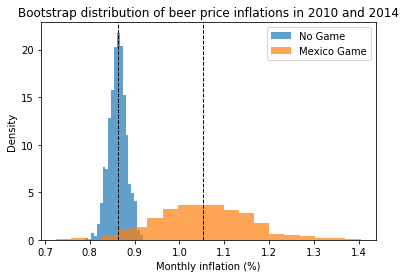

In [27]:
plt.hist(BSobsNO[0], 20, density=True, alpha=0.7, label="No Game")
plt.hist(BSobsYES[0], 20, density=True, alpha=0.7, label="Mexico Game")
plt.axvline(BSobsNO[0].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(BSobsYES[0].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Bootstrap distribution of beer price inflations in 2010 and 2014")
plt.xlabel('Monthly inflation (%)')
plt.ylabel('Density')

plt.legend(loc="upper right")
plt.savefig("Image Outputs/Beer price inflation WC.png")

## Beer price inflation: Comparison across cities in Clásico Regio week.

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, date, time
import math
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

beer_path = os.path.join(".", "Resources", "BeerPrices20102015.csv")
beer=pd.read_csv(beer_path,low_memory=False)
beer=beer.drop(columns={'Unnamed: 0'})
beer

,EST_FOLIO,CVE_MARCA,PRECIO_NORMAL,FECHA_OBS,PRECIO_OFERTA,FECHA_VIG,CVE_ESTADO,CVE_MUNICIPIO,EST_NOMBRE,EST_DIRECC,EST_LAT,EST_LON,DES_GIRO,NOM_MUNICIPIO,CVE_CIUDAD,NOM_ESTADO,NOM_CIUDAD,DES_MARCA,PRESENTACION,ACTIVO,DES_CADENA
0,208,11,49.20,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,VICTORIA,CANASTA O PAQUETE CON 6 BOTELLAS DE 325 ML. NO...,1.0,SUPERAMA
1,208,28,53.00,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,CANASTA O PAQUETE CON 6 BOTELLAS DE 355 ML. NO...,1.0,SUPERAMA
2,208,37,71.00,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,PAQUETE CON 8 LATAS DE 355 ML. C/U,1.0,SUPERAMA
3,208,15,69.00,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,BOHEMIA. CLASICA,CANASTA CON 6 BOTELLAS DE 325 ML. NO RETORNABLE,1.0,SUPERAMA
4,208,20,23.00,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,BOTELLA 940 ML. RETORNABLE,1.0,SUPERAMA
5,208,31,23.00,3/26/2010,0.0,NaN,9.0,6.0,SUPERAMA SUCURSAL PACHUCA,"PACHUCA 99, ENTRE FERNANDO MONTES DE OCA Y JU...",19.414977,-99.178431,TIENDA DE AUTOSERVICIO,CUAUHTEMOC,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,INDIO,BOTELLA 940 ML. RETORNABLE,1.0,SUPERAMA
6,20060,32,49.00,3/26/2010,0.0,NaN,1.0,1.0,SORIANA SUCURSAL SAN MARCOS,"CONVENCION S/N, ENTRE CARLOS SAGREDO Y FUNDICI...",0.000000,0.000000,TIENDA DE AUTOSERVICIO,AGUASCALIENTES,101.0,AGUASCALIENTES,AGUASCALIENTES,INDIO,CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE,1.0,SORIANA
7,20060,34,56.50,3/26/2010,0.0,NaN,1.0,1.0,SORIANA SUCURSAL SAN MARCOS,"CONVENCION S/N, ENTRE CARLOS SAGREDO Y FUNDICI...",0.000000,0.000000,TIENDA DE AUTOSERVICIO,AGUASCALIENTES,101.0,AGUASCALIENTES,AGUASCALIENTES,CORONA EXTRA,CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE,1.0,SORIANA
8,20060,28,52.00,3/26/2010,0.0,NaN,1.0,1.0,SORIANA SUCURSAL SAN MARCOS,"CONVENCION S/N, ENTRE CARLOS SAGREDO Y FUNDICI...",0.000000,0.000000,TIENDA DE AUTOSERVICIO,AGUASCALIENTES,101.0,AGUASCALIENTES,AGUASCALIENTES,SOL,CANASTA O PAQUETE CON 6 BOTELLAS DE 355 ML. NO...,1.0,SORIANA
9,363,28,52.00,3/26/2010,0.0,NaN,9.0,1.0,AURRERA BODEGA SUCURSAL SANTA LUCIA,"SANTA LUCIA 185, ESQ. ROSA BLANCA, COL. ALFONS...",19.378523,-99.199154,TIENDA DE AUTOSERVICIO,ALVARO OBREGON,901.0,DISTRITO FEDERAL,CIUDAD DE MÉXICO,SOL,CANASTA O PAQUETE CON 6 BOTELLAS DE 355 ML. NO...,1.0,BODEGA AURRERA


In [2]:
#Reworking Presentación

beer['PRESENTACION']=beer['PRESENTACION'].replace({'CANASTA O PAQUETE CON 6 BOTELLAS DE 325 ML. NO RETORNABLE' : '6 Botellas 325ml',
'CANASTA O PAQUETE CON 6 BOTELLAS DE 355 ML. NO RETORNABLE' : '6 Botellas 355ml',
'PAQUETE CON 8 LATAS DE 355 ML. C/U' : '8 Latas 355ml',
'CANASTA CON 6 BOTELLAS DE 325 ML. NO RETORNABLE' : '6 Botellas 325ml',
'BOTELLA 940 ML. RETORNABLE' : 'Botella 940ml',
'CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE' : '6 Botellas 355ml',
'PAQUETE CON 8 LATAS DE 355 ML.' : '8 Latas 355ml',
'BOTELLA 940 ML. RETORNABLE. FAMILIAR' : 'Botella 940ml',
'BOTELLA 1.2 LT. RETORNABLE' : 'Botella 1.2L',
'PAQUETE CON 6 LATAS DE 355 ML.' : '6 Latas 355ml',
'CANASTA CON 6 BOTELLAS DE 325 ML.' : '6 Botellas 325ml',
'SIX PACK CON 6 LATAS DE 355 ML.' : '6 Latas 355ml',
'SIX PACK CON 6 LATAS DE 355 ML. C/U' : '6 Latas 355ml',
'PAQUETE CON 6 LATAS DE 340 ML.' : '6 Latas 340ml',
'PAQUETE CON 8 LATAS DE 340 ML.' : '8 Latas 340ml',
'PAQUETE CON 8 LATAS DE 340 ML. C/U' : '8 Latas 340ml',
'CANASTA CON 6 BOTELLAS DE 355 ML. NO RETORNABLE (CLARA)' : '6 Botellas 355ml',
'PAQUETE CON 12 LATAS DE  355 ML.' : '12 Latas 355ml',
'PAQUETE CON 12 LATAS DE  355 ML.  C/U' : '12 Latas 355ml',
'PAQUETE CON 12 LATAS DE 355 ML. C/U' : '12 Latas 355ml'})

In [3]:
beer.groupby('PRESENTACION')['PRECIO_NORMAL'].count()

PRESENTACION
12 Latas 355ml       65368
6 Botellas 325ml    106578
6 Botellas 355ml    261302
6 Latas 340ml            9
6 Latas 355ml         4114
8 Latas 340ml         4605
8 Latas 355ml        26860
Botella 1.2L         49195
Botella 940ml        70301
Name: PRECIO_NORMAL, dtype: int64

In [4]:
#Reworking Brand

beer['DES_MARCA']=beer['DES_MARCA'].replace({'VICTORIA' : 'Victoria',
'SOL' : 'Sol',
'BOHEMIA. CLASICA' : 'Bohemia',
'INDIO' : 'Indio',
'CORONA EXTRA' : 'Corona',
'DOS EQUIS LAGER. ESPECIAL' : 'Dos Equis Lager',
'TECATE' : 'Tecate',
'CORONA' : 'Corona',
'NEGRA MODELO' : 'Negra Modelo',
'PACIFICO' : 'Pacifico',
'BARRILITO' : 'Barrilito',
'MODELO ESPECIAL' : 'Modelo Especial',
'DOS EQUIS LAGER ESPECIAL' : 'Dos Equis Lager',
'DOS EQUIS LAGER' : 'Dos Equis Lager',
'BOHEMIA.' : 'Bohemia'})

In [5]:
beer.groupby('DES_MARCA')['PRECIO_NORMAL'].count()

DES_MARCA
Barrilito          61644
Bohemia            50409
Corona             89548
Dos Equis Lager    44499
Indio              77367
Modelo Especial    16207
Negra Modelo       25005
Pacifico            2851
Sol                86894
Tecate             53998
Victoria           79910
Name: PRECIO_NORMAL, dtype: int64

In [6]:
#Reworking Brand+Presentación

beer['DES_PRODUCTOMARCA']=beer['DES_MARCA']+'-'+beer['PRESENTACION']
print(beer['DES_PRODUCTOMARCA'].unique().shape)
beer.groupby('DES_PRODUCTOMARCA')['PRECIO_NORMAL'].count()

(29,)


DES_PRODUCTOMARCA
Barrilito-6 Botellas 325ml          61644
Bohemia-6 Botellas 325ml             5720
Bohemia-6 Botellas 355ml            44689
Corona-6 Botellas 355ml             42383
Corona-Botella 940ml                47165
Dos Equis Lager-6 Botellas 325ml        2
Dos Equis Lager-6 Botellas 355ml    38505
Dos Equis Lager-6 Latas 340ml           9
Dos Equis Lager-6 Latas 355ml         369
Dos Equis Lager-8 Latas 340ml        4590
Dos Equis Lager-8 Latas 355ml        1024
Indio-6 Botellas 355ml              61319
Indio-Botella 1.2L                   8591
Indio-Botella 940ml                  7457
Modelo Especial-12 Latas 355ml      15693
Modelo Especial-6 Latas 355ml         514
Negra Modelo-6 Botellas 355ml       25005
Pacifico-6 Latas 355ml               2851
Sol-12 Latas 355ml                  10597
Sol-6 Botellas 355ml                49401
Sol-8 Latas 340ml                      15
Sol-8 Latas 355ml                   11296
Sol-Botella 940ml                   15585
Tecate-12 Latas 

In [7]:
#Fixing some prices: When PRECIO_OFERTA exists (i.e. !=0)m, use this instead of PRECIO_NORMAL

beer['PRECIO']=beer['PRECIO_NORMAL']
beer.loc[beer['PRECIO_OFERTA']!=0,'PRECIO']=beer['PRECIO_OFERTA'].astype(float)

In [8]:
#Reformat date variable to datetime, and extract week of year for later use.

beer['FECHA_OBS']=pd.to_datetime(beer['FECHA_OBS'],format="%m/%d/%Y")
beer['WeekYR']=beer['FECHA_OBS'].dt.week
beer['year']=beer['FECHA_OBS'].dt.year
beer['DayWK']=beer['FECHA_OBS'].dt.dayofweek

In [9]:
beer2=beer.drop(['FECHA_OBS','PRECIO_NORMAL','PRECIO_OFERTA','FECHA_VIG','ACTIVO','DayWK'],axis=1)

In [10]:
#Constructing IDs for each combination of Store-Marca-Presentación (i.e. each good-store). THIS IS OUR MAIN ID.

beer2=beer2.sort_values(['CVE_MARCA','PRESENTACION','EST_FOLIO'])
beer2['ID'] = (beer2.groupby(['CVE_MARCA','PRESENTACION','EST_FOLIO']).cumcount()==0).astype(int)
beer2['ID'] = beer2['ID'].cumsum()
beer2['ID'].unique()

array([   1,    2,    3, ..., 8520, 8521, 8522], dtype=int64)

In [11]:
#Constructing IDs for each combination of Marca-Presentación, i.e. "Good" ID.

beer2=beer2.sort_values(['CVE_MARCA','PRESENTACION'])
beer2['GoodID'] = (beer2.groupby(['CVE_MARCA','PRESENTACION']).cumcount()==0).astype(int)
beer2['GoodID'] = beer2['GoodID'].cumsum()
beer2['GoodID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [12]:
#Constructing IDs for each exising time period (i.e. week)

beer2=beer2.sort_values(['year','WeekYR'])
beer2['Per'] = (beer2.groupby(['year','WeekYR']).cumcount()==0).astype(int)
beer2['Per'] = beer2['Per'].cumsum()

In [13]:
beer2=beer2.sort_values(['ID','Per'])
beer2=beer2.reset_index(drop=True)


In [14]:
#Set variable in Weekly Terms.
    #In order to do this, weekly prices are defined as weekly averages of prices.

beer2=beer2.groupby(['EST_FOLIO','CVE_MARCA','CVE_ESTADO','CVE_MUNICIPIO','EST_NOMBRE','EST_DIRECC','EST_LAT','EST_LON','DES_GIRO','NOM_MUNICIPIO','CVE_CIUDAD','NOM_ESTADO','NOM_CIUDAD','DES_MARCA','PRESENTACION','DES_CADENA','DES_PRODUCTOMARCA','WeekYR','year','ID','GoodID','Per']).mean()
beer2=beer2.reset_index(drop=False)

In [15]:
#Set days since start of database, to calculate time between price takings.
    #Ideally, we want to have datapoints in which prices are collected every 7 days (i.e. each week)
    #and not irregular periods.
    
#Variable 'dayssincebeginning' will help us to detect this.

beer2['daysinYR']=365*(beer2['year']-2010)
beer2.loc[beer2['year']>=2012,'daysinYR']=beer2['daysinYR']+1

beer2['daysinWK']=7*(beer2['WeekYR']-1)
beer2['dayssincebeginning']=beer2['daysinYR']+beer2['daysinWK']

In [16]:
beer2=beer2.drop(['daysinYR','daysinWK'],axis=1)

In [17]:
#Transforming prices to natural logs.

beer2['PRECIO_LOG']=np.log(beer2['PRECIO'])

In [18]:
#Merge and calculate days between price takings
beer2=beer2.sort_values(['ID','Per'])
beer2['DAYS_CHG']=beer2.groupby('ID')['dayssincebeginning'].diff(periods=1)

In [19]:
#Keep only weekly prices takings (data is more structured, better behaved and easier to manipuilate)
beerY=beer2.loc[beer2['DAYS_CHG']==7]

In [20]:
#Calculate yearly inflation (log difference between one period and its lag 52 periods before (a year before))
#beerY['PRECIO_CHG']=100*beerY.groupby('ID')['PRECIO_LOG'].diff(periods=4)
beerY['PRECIO_CHG']=100*beerY.groupby('ID')['PRECIO'].pct_change(periods=52)

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#Reding Calendar with Clasico Regio dates and set to weekly format.
ClasicoRegio_path = os.path.join(".", "Resources", "ClasicoRegio19982019.csv")
ClasicoRegio = pd.read_csv(ClasicoRegio_path, encoding = "utf-8")
ClasicoRegio=ClasicoRegio.loc[ClasicoRegio['year']>=2010]
ClasicoRegio['FECHA_OBS']=pd.to_datetime(ClasicoRegio[['year', 'month', 'day']])
ClasicoRegio['WeekYR']=ClasicoRegio['FECHA_OBS'].dt.week
print(ClasicoRegio.shape)
ClasicoRegio
CR=ClasicoRegio.groupby(['year','WeekYR'])['Stage'].count()
CR=pd.DataFrame(CR)
CR=CR.reset_index(drop=False)
CR=CR.rename(columns={'Stage':'GamesRAYTIG'})
CR

(33, 12)


,year,WeekYR,GamesRAYTIG
0,2010,1,1
1,2010,6,1
2,2010,36,1
3,2011,7,1
4,2011,42,1
5,2012,14,1
6,2012,44,1
7,2013,13,1
8,2013,19,2
9,2013,32,1


In [23]:
#Merge Beer price dataset with clasicos datasets
beerY=pd.merge(beerY,CR,on=['year','WeekYR'],how='left')

In [24]:
#Keep dates when there is a game Clasico Regio
JuegoMTY_Y=beerY.loc[(beerY['GamesRAYTIG'].notnull())]

In [25]:
#Make DF for Monterrey prices
JuegoMTY_Y_YES=JuegoMTY_Y.loc[JuegoMTY_Y['NOM_CIUDAD']=='MONTERREY']

In [26]:
#Make dataframe for prices of other cities
JuegoMTY_Y_NO=JuegoMTY_Y.loc[JuegoMTY_Y['NOM_CIUDAD']!='MONTERREY']

In [27]:
#Work means by Presentacion, Brand and Store

#Monterrey
aMTY_Y_T=JuegoMTY_Y_YES.groupby('PRESENTACION')['PRECIO_CHG'].mean()
aMTY_Y_T=pd.DataFrame(aMTY_Y_T)
aMTY_Y_T=aMTY_Y_T.reset_index(drop=False)

aMTY_Y_B=JuegoMTY_Y_YES.groupby('DES_MARCA')['PRECIO_CHG'].mean()
aMTY_Y_B=pd.DataFrame(aMTY_Y_B)
aMTY_Y_B=aMTY_Y_B.reset_index(drop=False)

aMTY_Y_S=JuegoMTY_Y_YES.groupby('DES_CADENA')['PRECIO_CHG'].mean()
aMTY_Y_S=pd.DataFrame(aMTY_Y_S)
aMTY_Y_S=aMTY_Y_S.reset_index(drop=False)
aMTY_Y_S=aMTY_Y_S.loc[(aMTY_Y_S['DES_CADENA']=='H.E.B.') | (aMTY_Y_S['DES_CADENA']=='WAL-MART') | (aMTY_Y_S['DES_CADENA']=='SORIANA') | (aMTY_Y_S['DES_CADENA']=='BODEGA AURRERA')]

#Other cities
bMTY_Y_T=JuegoMTY_Y_NO.groupby('PRESENTACION')['PRECIO_CHG'].mean()
bMTY_Y_T=pd.DataFrame(bMTY_Y_T)
bMTY_Y_T=bMTY_Y_T.reset_index(drop=False)

bMTY_Y_B=JuegoMTY_Y_NO.groupby('DES_MARCA')['PRECIO_CHG'].mean()
bMTY_Y_B=pd.DataFrame(bMTY_Y_B)
bMTY_Y_B=bMTY_Y_B.reset_index(drop=False)

bMTY_Y_S=JuegoMTY_Y_NO.groupby('DES_CADENA')['PRECIO_CHG'].mean()
bMTY_Y_S=pd.DataFrame(bMTY_Y_S)
bMTY_Y_S=bMTY_Y_S.reset_index(drop=False)
bMTY_Y_S=bMTY_Y_S.loc[(bMTY_Y_S['DES_CADENA']=='H.E.B.') | (bMTY_Y_S['DES_CADENA']=='WAL-MART') | (bMTY_Y_S['DES_CADENA']=='SORIANA') | (bMTY_Y_S['DES_CADENA']=='BODEGA AURRERA')]


#Merge
abMTY_Y_T=pd.merge(aMTY_Y_T,bMTY_Y_T,on='PRESENTACION',how='left')
abMTY_Y_T=abMTY_Y_T.rename(columns={'PRECIO_CHG_x':'Monterrey','PRECIO_CHG_y':'Other cities'})

abMTY_Y_B=pd.merge(aMTY_Y_B,bMTY_Y_B,on='DES_MARCA',how='left')
abMTY_Y_B=abMTY_Y_B.rename(columns={'PRECIO_CHG_x':'Monterrey','PRECIO_CHG_y':'Other cities'})

abMTY_Y_S=pd.merge(aMTY_Y_S,bMTY_Y_S,on='DES_CADENA',how='left')
abMTY_Y_S=abMTY_Y_S.rename(columns={'PRECIO_CHG_x':'Monterrey','PRECIO_CHG_y':'Other cities'})

<Figure size 432x288 with 0 Axes>

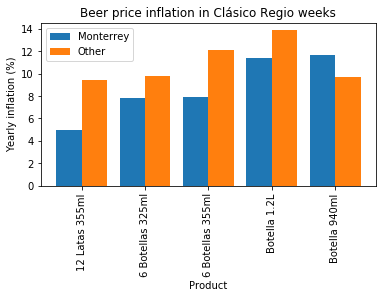

In [28]:
#Graph means by presentacion
plt.tight_layout()
plt.figure(figsize=(6,3))
Mty =plt.bar(abMTY_Y_T['PRESENTACION'],abMTY_Y_T['Monterrey'],align='edge',width=-0.4,label='Monterrey')
Ohter =plt.bar(abMTY_Y_T['PRESENTACION'],abMTY_Y_T['Other cities'],align='edge',width=0.4,label='Other')
plt.xticks(abMTY_Y_T['PRESENTACION'],rotation="vertical")
plt.title("Beer price inflation in Clásico Regio weeks")
plt.xlabel('Product')
plt.ylabel('Yearly inflation (%)')
plt.xticks(abMTY_Y_T['PRESENTACION'],rotation="vertical")
plt.legend(loc="upper left")
plt.savefig("Image Outputs/YearlyInflationByPresentacion.png", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

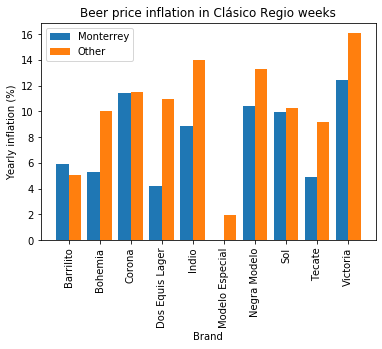

In [29]:
#Graph means by brand
plt.tight_layout()
plt.figure(figsize=(6,4))
Mty =plt.bar(abMTY_Y_B['DES_MARCA'],abMTY_Y_B['Monterrey'],align='edge',width=-0.4,label='Monterrey')
Ohter =plt.bar(abMTY_Y_B['DES_MARCA'],abMTY_Y_B['Other cities'],align='edge',width=0.4,label='Other')
plt.xticks(abMTY_Y_B['DES_MARCA'],rotation="vertical")
plt.title("Beer price inflation in Clásico Regio weeks")
plt.xlabel('Brand')
plt.ylabel('Yearly inflation (%)')
plt.xticks(abMTY_Y_B['DES_MARCA'],rotation="vertical")
plt.legend(loc="upper left")

plt.savefig("Image Outputs/YearlyInflationByBrand.png", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

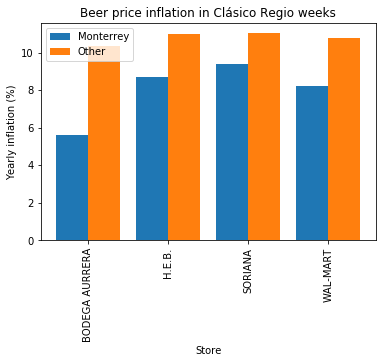

In [30]:
#Graph means by store
plt.tight_layout()
plt.figure(figsize=(6,4))
Mty =plt.bar(abMTY_Y_S['DES_CADENA'],abMTY_Y_S['Monterrey'],align='edge',width=-0.4,label='Monterrey')
Ohter =plt.bar(abMTY_Y_S['DES_CADENA'],abMTY_Y_S['Other cities'],align='edge',width=0.4,label='Other')
plt.xticks(abMTY_Y_S['DES_CADENA'],rotation="vertical")
plt.title("Beer price inflation in Clásico Regio weeks")
plt.xlabel('Store')
plt.ylabel('Yearly inflation (%)')
plt.xticks(abMTY_Y_S['DES_CADENA'],rotation="vertical")
plt.legend(loc="upper left")

plt.savefig("Image Outputs/YearlyInflationByStore.png", bbox_inches='tight')

# ¿Aumentan los conductores detenido por alcoholismo cuando juega México? 
Respuesta: A lo mexicanos nos gusta festejar. El número de detenidos aumenta cuando México gana

# 1. Manipular archivo de detenidos



In [32]:
## Dependencies
import os
import pandas as pd
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import stdev 
from fractions import Fraction as fr 
plt.style.use('ggplot')

In [33]:
#workfile
file_path = os.path.join(".", "Resources", "conductores_ebrios.csv")
file_detenidos = pd.read_csv(file_path)
file_detenidos.head()

,REM.,Día,Mes,Año,DICTAMEN MÉDICO,STATUS,CALLE 1 DE LA DETENCIÓN (A-M),CALLE S DE LA DETENCIÓN (N-Z),COLONIA,MARCA,TIPO,MODELO,ESTADO,COLONIA DONDE VIVEN SAN PEDRO
0,85552,2,NOVIEMBRE,2012,EBRIO INCOMPLETO,PAGO MULTA,RIO SUCHIATE,VASCONCELOS,DEL VALLE,AUDI,Q3,2013,NUEVO LEON,PEDREGAL DEL VALLE
1,85554,2,NOVIEMBRE,2012,EBRIO INCOMPLETO,CUMPLIO ARRESTO,RIO PANUCO,RIO MOCTEZUMA,DEL VALLE,FORD,ECOSPORT,2005,NUEVO LEON,NO APLICA
2,85561,3,NOVIEMBRE,2012,EBRIO COMPLETO,CUMPLIO ARRESTO,LAS TORRES,ZINC,SAN PEDRO 400,CHEVROLET,CHEVY,DESCONOCE,NUEVO LEON,NO APLICA
3,85562,3,NOVIEMBRE,2012,EBRIO INCOMPLETO,PAGO MULTA,GOMEZ MORIN,VIA COLLATINA,DEL VALLE,CHRYSLER,ASPEN,2007,NUEVO LEON,NO APLICA
4,85563,3,NOVIEMBRE,2012,EBRIO INCOMPLETO,CUMPLIO ARRESTO,GOMEZ MORIN,VIA COLLATINA,DEL VALLE,VW,JETTA,1998,NUEVO LEON,NO APLICA


In [34]:
#Vaidar valores de mes
file_detenidos.Mes.unique()

array(['NOVIEMBRE', 'DICIEMBRE', 'ENERO', 'FEBRERO', 'MARZO', 'ABRIL',
       'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE'],
      dtype=object)

In [35]:
#Validar valores de año
file_detenidos.Año.unique()

array(['2012', '2013', '2014', 'Sin Dato'], dtype=object)

In [36]:
#Quitar "Sin Dato de columna año"
file_detenidos = file_detenidos[file_detenidos.Año != 'Sin Dato']

In [37]:
#Validar valores de día
file_detenidos.Día.unique()

array([ 2,  3,  4, 10, 11, 16, 19, 25, 26, 30,  1,  5,  7,  8,  9, 12, 14,
       15, 20, 21, 22, 23, 28,  6, 13, 18, 27, 17, 24, 31, 29],
      dtype=int64)

In [38]:
#Reemplazar string mes con número

mapping = {'NOVIEMBRE':11, 'DICIEMBRE':12, 'ENERO':1, 'FEBRERO':2, 'MARZO':3, 'ABRIL':4,
       'MAYO':5, 'JUNIO':6, 'JULIO':7, 'AGOSTO':8, 'SEPTIEMBRE':9, 'OCTUBRE':10}

file_detenidos = file_detenidos.replace({'Mes': mapping})

In [39]:
## 1.2 Formatear fecha: AAAA-MM-DD

#Crear data frame con fecha
fecha = pd.DataFrame({'year': file_detenidos.Año,
                   'month': file_detenidos.Mes,
                   'day': file_detenidos.Día})

#convertir data frame a formato fecha
fecha = pd.to_datetime(fecha, format="%Y/%m/%d")

#agregrar fecha a base de datos inicial
file_detenidos["fecha"]  = fecha.astype('datetime64[ns]')



In [40]:
#Numero de detenidos diario
group_detenidos = file_detenidos.groupby(["fecha","Día","Mes","Año"])

group_detenidos.head()


numero_detenidos = group_detenidos["REM."].count()

df_numero_detenidos = pd.DataFrame(numero_detenidos)


#resetear index 
df_numero_detenidos = df_numero_detenidos.reset_index(drop=False)

df_numero_detenidos.head()

df_numero_detenidos["Año_Mes"]=df_numero_detenidos["Año"].astype(str)+'-'+df_numero_detenidos["Mes"].astype(str)


In [41]:
#Numero de detenidos diario
group_detenidos = df_numero_detenidos.groupby("Año_Mes")

avg_detenidos = group_detenidos["REM."].mean()
avg_detenidos

avg_detenidos = avg_detenidos.reset_index(drop=False)


In [42]:
df_numero_detenidos.describe()

,Día,Mes,REM.
count,335.000000,335.000000,335.000000
mean,15.779104,6.770149,4.429851
std,9.002936,3.530577,3.668976
min,1.000000,1.000000,1.000000
25%,8.000000,4.000000,1.000000
50%,16.000000,7.000000,3.000000
75%,23.500000,10.000000,7.000000
max,31.000000,12.000000,16.000000


In [43]:
#filtrar 2013 y 2014

df_numero_detenidos_2014=df_numero_detenidos.loc[df_numero_detenidos.Año=='2014']
df_numero_detenidos_2014=df_numero_detenidos.loc[df_numero_detenidos.Año=='2013']


In [44]:
#filtrar juegos durante el mundial
df_numero_detenidos_2014_06=df_numero_detenidos_2014.loc[df_numero_detenidos.Mes==6]


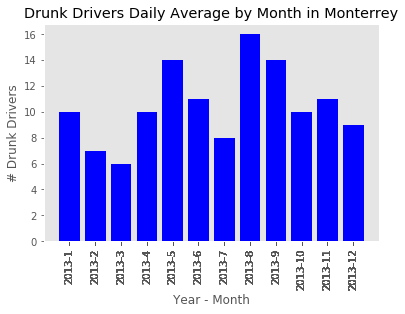

In [45]:
#Graficar número de detenidos diarios 2013 y 2014

plt.bar(df_numero_detenidos_2014.Año_Mes, 
             df_numero_detenidos_2014["REM."], 
             color="b")

plt.title("Drunk Drivers Daily Average by Month in Monterrey")
plt.ylabel("# Drunk Drivers")
plt.xlabel("Year - Month")
plt.xticks(df_numero_detenidos_2014.Año_Mes, rotation='vertical')
plt.grid(False)
    
plt.savefig("./Image Outputs/Drunk_Drivers_Daily_Average_by_Month_in_Monterrey.png")

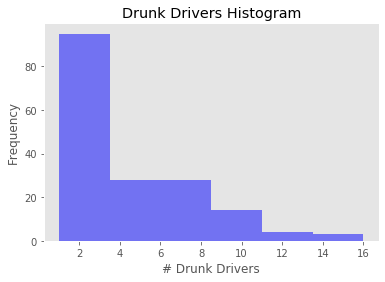

In [46]:
#Histograma de conductores ebrios

ax = df_numero_detenidos_2014["REM."].plot.hist(bins=6, alpha=0.5, color="blue")
plt.title("Drunk Drivers Histogram")
plt.xlabel("# Drunk Drivers")
plt.grid(False)
plt.savefig("./Image Outputs/Drunk_Drivers_Histogram.png")


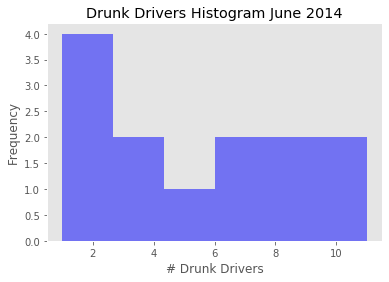

In [47]:
#Histograma de conductores ebrios durante junio 2014
ax2 = df_numero_detenidos_2014_06["REM."].plot.hist(bins=6, alpha=0.5, color="blue")
plt.title("Drunk Drivers Histogram June 2014")
plt.xlabel("# Drunk Drivers")
plt.grid(False)
plt.savefig("./Image Outputs/Drunk_Drivers_Histogram_June_2014.png")

# 2. Analizar base de juegos del mundial e identificar juegos de MX y resultados

In [48]:
## 2.1 Llamar archivo de juegos históricos
file2_path = os.path.join(".", "Resources", "Historico_partidos_3.csv")
file_historico = pd.read_csv(file2_path)
file_historico.head()

file_historico.dtypes

date            object
new_date        object
home_team       object
away_team       object
home_score       int64
away_score       int64
tournament      object
city            object
country         object
neutral           bool
Unnamed: 10    float64
Unnamed: 11    float64
dtype: object

In [49]:
type(file_historico['new_date'])

pandas.core.series.Series

In [50]:
#revisar fechas 
fechas_unicas = file_historico.new_date.unique()
fechas_unicas

array(['1972/11/30', '1973/03/08', '1974/03/07', ..., '2019/09/18',
       '2019/09/29', '2019/09/30'], dtype=object)

In [51]:
file_historico.dtypes

date            object
new_date        object
home_team       object
away_team       object
home_score       int64
away_score       int64
tournament      object
city            object
country         object
neutral           bool
Unnamed: 10    float64
Unnamed: 11    float64
dtype: object

In [52]:
file_historico.head()

,date,new_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Unnamed: 10,Unnamed: 11
0,1872-11-30,1972/11/30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN
1,1873-03-08,1973/03/08,England,Scotland,4,2,Friendly,London,England,False,NaN,NaN
2,1874-03-07,1974/03/07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN,NaN
3,1875-03-06,1975/03/06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN
4,1876-03-04,1976/03/04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN,NaN


In [53]:
file_historico = file_historico.drop(['Unnamed: 10','Unnamed: 11'],axis=1)


In [54]:
## Agregar columna para identificar si jugó MX como home o away y filtrar MX

file_historico.loc[file_historico.home_team == 'Mexico', 'MX play'] = 1
file_historico.loc[file_historico.away_team == 'Mexico', 'MX play'] = 1

partidos_MX = file_historico.dropna()

partidos_MX.head()


,date,new_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,MX play
680,1/1/23,2023/01/01,Guatemala,Mexico,2,3,Friendly,Guatemala,Guatemala,False,1.0
682,1/4/23,2023/01/04,Guatemala,Mexico,3,1,Friendly,Guatemala,Guatemala,False,1.0
683,1/7/23,2023/01/07,Guatemala,Mexico,1,4,Friendly,Guatemala,Guatemala,False,1.0
766,12/9/23,2023/12/09,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,False,1.0
767,12/12/23,2023/12/12,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,False,1.0


In [55]:
#aislar los juegos donde Mexico jugo de local

file_historico_mx_home=file_historico.loc[file_historico.away_team == 'Mexico']

In [56]:
## If home team = Mexico then 1 if not 0

home_win= partidos_MX["home_score"] > partidos_MX["away_score"]

partidos_MX["home_win"]  = home_win.astype(int)

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [57]:
## Definir si MX ganó o perdió

partidos_MX.loc[(partidos_MX.home_team == 'Mexico') & (partidos_MX.home_win == 1), 'MX won'] = 1
partidos_MX.loc[(partidos_MX.home_team == 'Mexico') & (partidos_MX.home_win == 0), 'MX won'] = 0
partidos_MX.loc[(partidos_MX.away_team == 'Mexico') & (partidos_MX.home_win == 1), 'MX won'] = 0
partidos_MX.loc[(partidos_MX.away_team == 'Mexico') & (partidos_MX.home_win == 0), 'MX won'] = 1


C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [58]:
###convertir data frame a formato fecha

fecha = pd.to_datetime(partidos_MX.new_date, format="%Y-%m-%d")

#agregrar fecha a base de datos inicial
partidos_MX["fecha"]  = fecha.astype('datetime64[ns]')


C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
partidos_MX['year'], partidos_MX['month'] = partidos_MX['fecha'].dt.year, partidos_MX['fecha'].dt.month

partidos_MX["Año_Mes"]=partidos_MX["year"].astype(str)+'-'+partidos_MX["month"].astype(str)


C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
tournament = partidos_MX.tournament.unique()
tournament

array(['Friendly', 'FIFA World Cup', 'FIFA World Cup qualification',
       'NAFU Championship', 'Pan American Championship',
       'CONCACAF Championship', 'Korea Cup', 'Gold Cup', 'Copa América',
       'Confederations Cup', 'USA Cup', 'Kirin Cup', 'Lunar New Year Cup'],
      dtype=object)

In [61]:

partidos_MX_2=partidos_MX.loc[partidos_MX.tournament == 'FIFA World Cup']


In [62]:
partidos_MX.head()

,date,new_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,MX play,home_win,MX won,fecha,year,month,Año_Mes
680,1/1/23,2023/01/01,Guatemala,Mexico,2,3,Friendly,Guatemala,Guatemala,False,1.0,0,1.0,2023-01-01,2023,1,2023-1
682,1/4/23,2023/01/04,Guatemala,Mexico,3,1,Friendly,Guatemala,Guatemala,False,1.0,1,0.0,2023-01-04,2023,1,2023-1
683,1/7/23,2023/01/07,Guatemala,Mexico,1,4,Friendly,Guatemala,Guatemala,False,1.0,0,1.0,2023-01-07,2023,1,2023-1
766,12/9/23,2023/12/09,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,False,1.0,1,1.0,2023-12-09,2023,12,2023-12
767,12/12/23,2023/12/12,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,False,1.0,1,1.0,2023-12-12,2023,12,2023-12


# 3. Merge de Detenidos y Juegos

In [63]:
## Merge de tablas por fecha
#Cruzar contra fecha de partidos de MX en mundial 2014

data_merge = pd.merge(avg_detenidos, partidos_MX, how="outer", on=["Año_Mes", "Año_Mes"])

data_merge

,Año_Mes,REM.,date,new_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,MX play,home_win,MX won,fecha,year,month
0,2012-11,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,2012-12,3.352941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,2013-1,3.909091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,2013-10,3.571429,10/11/13,2013/10/11,Mexico,Panama,2.0,1.0,FIFA World Cup qualification,Mexico City,Mexico,False,1.0,1.0,1.0,2013-10-11,2013.0,10.0
4,2013-10,3.571429,10/15/13,2013/10/15,Costa Rica,Mexico,2.0,1.0,FIFA World Cup qualification,San José,Costa Rica,False,1.0,1.0,0.0,2013-10-15,2013.0,10.0
5,2013-11,4.117647,11/20/13,2013/11/20,New Zealand,Mexico,2.0,4.0,FIFA World Cup qualification,Wellington,New Zealand,False,1.0,0.0,1.0,2013-11-20,2013.0,11.0
6,2013-12,3.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
7,2013-2,3.076923,2/6/13,2013/02/06,Mexico,Jamaica,0.0,0.0,FIFA World Cup qualification,Mexico City,Mexico,False,1.0,0.0,0.0,2013-02-06,2013.0,2.0
8,2013-3,2.777778,3/22/13,2013/03/22,Honduras,Mexico,2.0,2.0,FIFA World Cup qualification,San Pedro Sula,Honduras,False,1.0,0.0,1.0,2013-03-22,2013.0,3.0
9,2013-3,2.777778,3/26/13,2013/03/26,Mexico,United States,0.0,0.0,FIFA World Cup qualification,Mexico City,Mexico,False,1.0,0.0,0.0,2013-03-26,2013.0,3.0


In [64]:
data_merge_group = data_merge.groupby("Año_Mes")

avg_detenidos = data_merge_group["REM."].mean()


MX_play = data_merge_group["MX play"].sum()

df = pd.DataFrame(avg_detenidos)

df["MX play"]=MX_play

df = data_merge.dropna()

#data_merge=data_merge.loc[data_merge.tournament=='FIFA World Cup']
#data_merge
df.head()

#data_merge_new = data_merge.dropna()
#data_merge_new

,Año_Mes,REM.,date,new_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,MX play,home_win,MX won,fecha,year,month
3,2013-10,3.571429,10/11/13,2013/10/11,Mexico,Panama,2.0,1.0,FIFA World Cup qualification,Mexico City,Mexico,False,1.0,1.0,1.0,2013-10-11,2013.0,10.0
4,2013-10,3.571429,10/15/13,2013/10/15,Costa Rica,Mexico,2.0,1.0,FIFA World Cup qualification,San José,Costa Rica,False,1.0,1.0,0.0,2013-10-15,2013.0,10.0
5,2013-11,4.117647,11/20/13,2013/11/20,New Zealand,Mexico,2.0,4.0,FIFA World Cup qualification,Wellington,New Zealand,False,1.0,0.0,1.0,2013-11-20,2013.0,11.0
7,2013-2,3.076923,2/6/13,2013/02/06,Mexico,Jamaica,0.0,0.0,FIFA World Cup qualification,Mexico City,Mexico,False,1.0,0.0,0.0,2013-02-06,2013.0,2.0
8,2013-3,2.777778,3/22/13,2013/03/22,Honduras,Mexico,2.0,2.0,FIFA World Cup qualification,San Pedro Sula,Honduras,False,1.0,0.0,1.0,2013-03-22,2013.0,3.0


In [65]:

mapping = {1.0:'win', 0.0:'lose'}
df = df.replace({"MX won": mapping})

df_group = df.groupby("MX won")
mx_win_group = df_group["REM."].mean()
mx_win_group



MX won
lose    4.390404
win     4.669780
Name: REM., dtype: float64

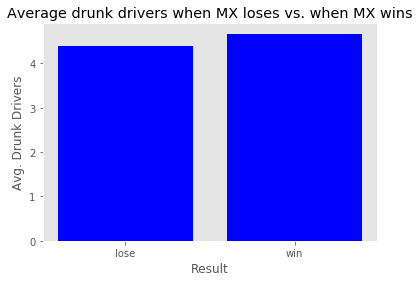

In [66]:
plt.bar(mx_win_group.index, 
             mx_win_group, 
             color="b")

plt.title("Average drunk drivers when MX loses vs. when MX wins")
plt.ylabel("Avg. Drunk Drivers")
plt.xlabel("Result")
#plt.xticks(mx_win_group["MX won"], rotation='vertical')
plt.grid(False)
plt.savefig("./Image Outputs/Average drunk drivers when MX loses vs. when MX wins.png")

## Urgencias en Nuevo León cuando sucede el Clásico Regio

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import os

URG_path = os.path.join(".", "Resources", "URG.csv")
URG=pd.read_csv(URG_path)
URG=URG.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
URG=URG.loc[URG['Estado']=='NL']
URG=URG.drop_duplicates()

In [72]:
ClasicoRegio_path = os.path.join(".", "Resources", "ClasicoRegio19982019.csv")
ClasicoRegio = pd.read_csv(ClasicoRegio_path, encoding = "utf-8")
ClasicoRegio=ClasicoRegio.rename(columns={'day':'Day','month':'Month','year':'Year'})
ClasicoRegio['Fecha']=pd.to_datetime(ClasicoRegio[['Year', 'Month', 'Day']])
ClasicoRegio['Game']=1
ClasicoRegio_post=ClasicoRegio
ClasicoRegio=ClasicoRegio.drop('Fecha',axis=1)
ClasicoRegio

,Day,Month,Year,Tournament,Stage,Home_Team,Home_Goals,Away_Team,Away_Goals,Stadium,Game
0,27,2,1998,Liga MX,Regular season,Tigres,1,Rayados,0,Estadio Universitario,1
1,12,9,1998,Liga MX,Regular season,Rayados,1,Tigres,1,Estadio Tecnologico,1
2,19,12,1998,Friendly,Regular season,Tigres,3,Rayados,2,Estadio Universitario,1
3,27,2,1999,Liga MX,Regular season,Tigres,2,Rayados,0,Estadio Universitario,1
4,22,9,1999,Liga MX,Regular season,Tigres,2,Rayados,0,Estadio Universitario,1
5,18,12,1999,Friendly,Regular season,Rayados,2,Tigres,3,Estadio Tecnologico,1
6,26,2,2000,Liga MX,Regular season,Rayados,3,Tigres,6,Estadio Tecnologico,1
7,5,4,2000,Liga MX,Regular season,Rayados,0,Tigres,0,Estadio Tecnologico,1
8,2,9,2000,Liga MX,Regular season,Rayados,1,Tigres,0,Estadio Tecnologico,1
9,29,12,2000,Friendly,Other,Tigres,2,Rayados,2,Estadio Universitario,1


In [73]:
ClasicoRegio_post['Fecha']=ClasicoRegio_post['Fecha']+ timedelta(1)
ClasicoRegio_post['Year']=ClasicoRegio_post['Fecha'].dt.year
ClasicoRegio_post['Month']=ClasicoRegio_post['Fecha'].dt.month
ClasicoRegio_post['Day']=ClasicoRegio_post['Fecha'].dt.day
#ClasicoRegio_post=ClasicoRegio_post.rename(columns={'Game':'Game_post'})
ClasicoRegio_post=ClasicoRegio_post.drop('Fecha',axis=1)
ClasicoRegio=ClasicoRegio.append(ClasicoRegio_post,ignore_index=True)

In [74]:
URG=pd.merge(URG,ClasicoRegio,on=['Year','Month','Day'],how='left')
URG
URG.loc[(URG['Game']==1) & ((URG['Stage']=='Playoffs') | (URG['Stage']=='Finals'))]

,Estado,Fecha,Total,Gender1,Gender2,Age1,Age2,Age3,Age4,Age5,...,Month,Day,Tournament,Stage,Home_Team,Home_Goals,Away_Team,Away_Goals,Stadium,Game
1960,NL,2013-05-08,560,190,370,86,106,129,82,48,...,5,8,Liga MX,Playoffs,Rayados,1.0,Tigres,0.0,Estadio Tecnologico,1.0
1961,NL,2013-05-09,729,267,462,190,119,149,88,59,...,5,9,Liga MX,Playoffs,Rayados,1.0,Tigres,0.0,Estadio Tecnologico,1.0
1963,NL,2013-05-11,748,310,438,142,120,173,101,77,...,5,11,Liga MX,Playoffs,Tigres,1.0,Rayados,1.0,Estadio Universitario,1.0
1964,NL,2013-05-12,645,263,382,149,123,158,81,52,...,5,12,Liga MX,Playoffs,Tigres,1.0,Rayados,1.0,Estadio Universitario,1.0
3165,NL,2016-05-11,650,195,455,180,137,128,59,45,...,5,11,Liga MX,Playoffs,Tigres,1.0,Rayados,3.0,Estadio Universitario,1.0
3166,NL,2016-05-12,710,225,485,170,143,163,64,50,...,5,12,Liga MX,Playoffs,Tigres,1.0,Rayados,3.0,Estadio Universitario,1.0
3168,NL,2016-05-14,577,201,376,147,106,137,56,43,...,5,14,Liga MX,Playoffs,Rayados,1.0,Tigres,2.0,Estadio BBVA Bancomer,1.0
3169,NL,2016-05-15,647,223,424,153,131,152,76,58,...,5,15,Liga MX,Playoffs,Rayados,1.0,Tigres,2.0,Estadio BBVA Bancomer,1.0
3488,NL,2017-05-10,606,267,339,161,107,98,67,64,...,5,10,Liga MX,Playoffs,Tigres,4.0,Rayados,1.0,Estadio Universitario,1.0
3489,NL,2017-05-11,874,362,512,207,181,163,85,88,...,5,11,Liga MX,Playoffs,Tigres,4.0,Rayados,1.0,Estadio Universitario,1.0


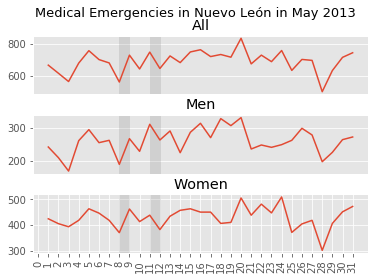

In [75]:
a=URG.loc[(URG['Year']==2013) & (URG['Month']==5)]
a=a.sort_values('Fecha')

plt.subplot(3, 1, 1)
plt.plot(
    a['Day'],
    a['Total'])
plt.axvspan(8, 9, alpha=0.2, color='gray')
plt.axvspan(11, 12, alpha=0.2, color='gray')
plt.xticks([])
plt.title("All")

plt.subplot(3, 1, 2)
plt.plot(
    a['Day'],
    a['Gender1'])
plt.axvspan(8, 9, alpha=0.2, color='gray')
plt.axvspan(11, 12, alpha=0.2, color='gray')
plt.xticks([])
plt.title("Men")

plt.subplot(3, 1, 3)
plt.plot(
    a['Day'],
    a['Gender2'])
plt.axvspan(8, 9, alpha=0.2, color='gray')
plt.axvspan(11, 12, alpha=0.2, color='gray')
plt.xticks(np.arange(32),rotation=90)
plt.title("Women")
plt.subplots_adjust(hspace=0.35)
plt.suptitle("Medical Emergencies in Nuevo León in May 2013", fontsize=13)
plt.savefig('./Image Outputs/URG_May2013.png')

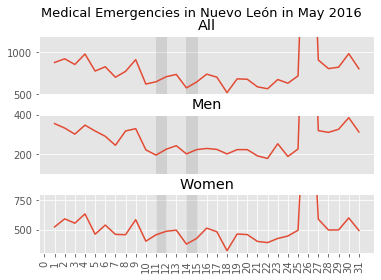

In [76]:
a=URG.loc[(URG['Year']==2016) & (URG['Month']==5)]
a=a.sort_values('Fecha')

plt.subplot(3, 1, 1)
plt.plot(
    a['Day'],
    a['Total'])
plt.axvspan(11, 12, alpha=0.2, color='gray')
plt.axvspan(14, 15, alpha=0.2, color='gray')
plt.xticks([])
plt.ylim(500,1200)
plt.title("All")

plt.subplot(3, 1, 2)
plt.plot(
    a['Day'],
    a['Gender1'])
plt.axvspan(11, 12, alpha=0.2, color='gray')
plt.axvspan(14, 15, alpha=0.2, color='gray')
plt.xticks([])
plt.ylim(100,400)
plt.title("Men")

plt.subplot(3, 1, 3)
plt.plot(
    a['Day'],
    a['Gender2'])
plt.axvspan(11, 12, alpha=0.2, color='gray')
plt.axvspan(14, 15, alpha=0.2, color='gray')
plt.xticks(np.arange(32),rotation=90)
plt.ylim(300,800)
plt.title("Women")
plt.subplots_adjust(hspace=0.35)
plt.suptitle("Medical Emergencies in Nuevo León in May 2016", fontsize=13)
plt.savefig('./Image Outputs/URG_May2016.png')

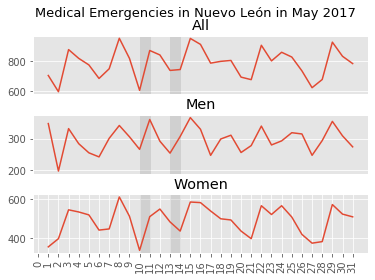

In [77]:
a=URG.loc[(URG['Year']==2017) & (URG['Month']==5)]
a=a.sort_values('Fecha')

plt.subplot(3, 1, 1)
plt.plot(
    a['Day'],
    a['Total'])
plt.axvspan(10, 11, alpha=0.2, color='gray')
plt.axvspan(13, 14, alpha=0.2, color='gray')
plt.xticks([])
plt.title("All")

plt.subplot(3, 1, 2)
plt.plot(
    a['Day'],
    a['Gender1'])
plt.axvspan(10, 11, alpha=0.2, color='gray')
plt.axvspan(13, 14, alpha=0.2, color='gray')
plt.xticks([])
plt.title("Men")

plt.subplot(3, 1, 3)
plt.plot(
    a['Day'],
    a['Gender2'])
plt.axvspan(10, 11, alpha=0.2, color='gray')
plt.axvspan(13, 14, alpha=0.2, color='gray')
plt.xticks(np.arange(32),rotation=90)
plt.title("Women")
plt.subplots_adjust(hspace=0.35)
plt.suptitle("Medical Emergencies in Nuevo León in May 2017", fontsize=13)
plt.savefig('./Image Outputs/URG_May2017.png')

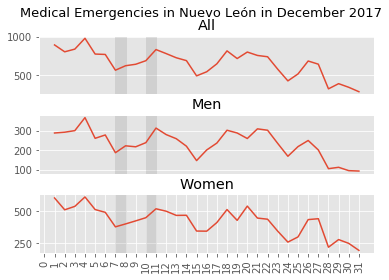

In [78]:
a=URG.loc[(URG['Year']==2017) & (URG['Month']==12)]
a=a.sort_values('Fecha')

plt.subplot(3, 1, 1)
plt.plot(
    a['Day'],
    a['Total'])
plt.axvspan(7, 8, alpha=0.2, color='gray')
plt.axvspan(11, 10, alpha=0.2, color='gray')
plt.xticks([])
plt.title("All")

plt.subplot(3, 1, 2)
plt.plot(
    a['Day'],
    a['Gender1'])
plt.axvspan(7, 8, alpha=0.2, color='gray')
plt.axvspan(11, 10, alpha=0.2, color='gray')
plt.xticks([])
plt.title("Men")

plt.subplot(3, 1, 3)
plt.plot(
    a['Day'],
    a['Gender2'])
plt.axvspan(7, 8, alpha=0.2, color='gray')
plt.axvspan(11, 10, alpha=0.2, color='gray')
plt.xticks(np.arange(32),rotation=90)
plt.title("Women")
plt.subplots_adjust(hspace=0.35)
plt.suptitle("Medical Emergencies in Nuevo León in December 2017", fontsize=13)
plt.savefig('./Image Outputs/URG_Dec2017.png')

# Analisis de Defunciones por Homicidios y por Accidentes de Transito en todo el pais durante la temporada 2016-2017 de la Liga MX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import calendar
import dateutil
from sklearn.utils import resample

In [2]:
# Importar y leer los CSVs de Partidos y de Defunciones
path_defunciones = os.path.join(".","Resources", "def17 - DB.csv")
defunciones_DB = pd.read_csv(path_defunciones, encoding = "utf-8")

path_campeonato = os.path.join(".","Resources", "LIGAMX2016-2017_SCORES_FIXTURES.csv")
campeonato1617_DB = pd.read_csv(path_campeonato, encoding = "utf-8")

In [3]:
#Escoger las columnas del campeonato
campeonato1617_DB_table = campeonato1617_DB[['Date', 'Home', 'Score', 'Away','Attendance', 'Venue']]
campeonato1617_DB_table.head(3)

,Date,Home,Score,Away,Attendance,Venue
0,7/15/2016,Tijuana,2–0,Morelia,26833.0,Estadio Caliente
1,7/16/2016,Querétaro,2–0,Veracruz,22059.0,Estadio La Corregidora
2,7/16/2016,Atlas,1–1,Toluca,34729.0,Estadio Jalisco


In [4]:
#Transformar la fecha a DateTime para poder identificar el día de la semana
campeonato1617_DB_table["Date"] = pd.to_datetime(campeonato1617_DB_table["Date"])

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
# Codificar con DateTime el Día de la Semana en Lunes 0, Martes 1, Miércoles 2... para identificar la muestra 
campeonato1617_DB_table["WeekDay"] = campeonato1617_DB_table["Date"].dt.dayofweek
campeonato1617_DB_table.head(3)

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Home,Score,Away,Attendance,Venue,WeekDay
0,2016-07-15,Tijuana,2–0,Morelia,26833.0,Estadio Caliente,4
1,2016-07-16,Querétaro,2–0,Veracruz,22059.0,Estadio La Corregidora,5
2,2016-07-16,Atlas,1–1,Toluca,34729.0,Estadio Jalisco,5


In [6]:
# Revisar el catálogo de diccionarios diccionario_datosd_defunciones_generales_2017.xlsx para seleccionar los datos
columnas = ["ent_regis","sexo","dia_ocurr","mes_ocurr",
"anio_ocur", "gr_lismex", "edad_agru"]

#Transformar los datos seleccionados a mayúsculas para poder seleccionar las columnas
columnas_names = [x.upper() for x in columnas]
columnas_names

['ENT_REGIS',
 'SEXO',
 'DIA_OCURR',
 'MES_OCURR',
 'ANIO_OCUR',
 'GR_LISMEX',
 'EDAD_AGRU']

In [7]:
defunciones_DB.head(3)

,ENT_REGIS,MUN_REGIS,ENT_RESID,MUN_RESID,TLOC_RESID,LOC_RESID,ENT_OCURR,MUN_OCURR,TLOC_OCURR,LOC_OCUR,...,ANIO_CERT,MATERNAS,LENGUA,COND_ACT,PAR_AGRE,ENT_OCULES,MUN_OCULES,LOC_OCULES,RAZON_M,DIS_RE_OAX
0,1,1,1,1,15,1,1,1,15,1,...,2017,NaN,9,2,88,88,888,8888,NaN,999
1,1,9,1,9,1,16,1,9,1,16,...,2017,NaN,9,2,88,88,888,8888,NaN,999
2,1,1,1,1,15,1,1,1,15,1,...,2017,NaN,9,1,88,88,888,8888,NaN,999


In [8]:
# Limpiar las columnas de la base de Defunciones
defunciones_DB_light = defunciones_DB[(columnas_names)]
defunciones_DB_light.head(3)

,ENT_REGIS,SEXO,DIA_OCURR,MES_OCURR,ANIO_OCUR,GR_LISMEX,EDAD_AGRU
0,1,2,26,7,1994,30,18
1,1,2,10,11,2011,30,23
2,1,1,12,2,2011,20,22


In [9]:
defunciones_DB_light.count()

ENT_REGIS    703047
SEXO         703047
DIA_OCURR    703047
MES_OCURR    703047
ANIO_OCUR    703047
GR_LISMEX    703047
EDAD_AGRU    703047
dtype: int64

# ******NO CORRER ESTA LÍNEA****** posibles maneras de Drop según un valor específico *****NO CORRER ESTA LÍNEA****

df.drop(df.loc[df['line_race']==0].index, inplace=True)

# Remove projects that made no money at all
filter_DF = extract_DF["pledged"] > 0
extract_DF = extract_DF.loc[filter_DF, :]
extract_DF

data = data.drop("Ireland", axis=0). # Delete all rows with label "Ireland"

my_dataframe = my_dataframe[my_dataframe.employee_name != 'chad']

df.drop(df.index[df['line_race'] == 0], inplace = True)

In [10]:
#Drop los registros con fechas no específicas, ya sea en su día, mes o año
defunciones_DB_light.drop(defunciones_DB_light.index[defunciones_DB_light["DIA_OCURR"] == 99], inplace=True)
defunciones_DB_light.drop(defunciones_DB_light.index[defunciones_DB_light["MES_OCURR"] == 99], inplace=True)
defunciones_DB_light.drop(defunciones_DB_light.index[defunciones_DB_light["ANIO_OCUR"] == 9999], inplace=True)

defunciones_DB_light.head(3)

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,ENT_REGIS,SEXO,DIA_OCURR,MES_OCURR,ANIO_OCUR,GR_LISMEX,EDAD_AGRU
0,1,2,26,7,1994,30,18
1,1,2,10,11,2011,30,23
2,1,1,12,2,2011,20,22


In [11]:
#Checar la nueva cantidad de rows que quedaron con el drop
defunciones_DB_light.count()

ENT_REGIS    702480
SEXO         702480
DIA_OCURR    702480
MES_OCURR    702480
ANIO_OCUR    702480
GR_LISMEX    702480
EDAD_AGRU    702480
dtype: int64

In [12]:
#Convertir a string antes de concatenar
defunciones_DB_light["ANIO_OCUR"] = defunciones_DB_light["ANIO_OCUR"].astype(str)
defunciones_DB_light["MES_OCURR"] = defunciones_DB_light["MES_OCURR"].astype(str)
defunciones_DB_light["DIA_OCURR"] = defunciones_DB_light["DIA_OCURR"].astype(str)
defunciones_DB_light.head(3)

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,ENT_REGIS,SEXO,DIA_OCURR,MES_OCURR,ANIO_OCUR,GR_LISMEX,EDAD_AGRU
0,1,2,26,7,1994,30,18
1,1,2,10,11,2011,30,23
2,1,1,12,2,2011,20,22


In [13]:
# Concatenar los años, meses y días de la base de Defunciones
defunciones_DB_light["Date Registered"] = defunciones_DB_light["ANIO_OCUR"].map(str) + '-' + defunciones_DB_light["MES_OCURR"].map(str) + '-' + defunciones_DB_light["DIA_OCURR"].map(str)
defunciones_DB_light.head(3)

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ENT_REGIS,SEXO,DIA_OCURR,MES_OCURR,ANIO_OCUR,GR_LISMEX,EDAD_AGRU,Date Registered
0,1,2,26,7,1994,30,18,1994-7-26
1,1,2,10,11,2011,30,23,2011-11-10
2,1,1,12,2,2011,20,22,2011-2-12


In [14]:
# Convertir a DateTime para luego poder...
# Codificar las fechas en Día de la Semana Lunes 0 Martes 1, Miércoles 3... para identificar la muestra 
defunciones_DB_light["Date Registered"] = pd.to_datetime(defunciones_DB_light["Date Registered"])
defunciones_DB_light.head(5)

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ENT_REGIS,SEXO,DIA_OCURR,MES_OCURR,ANIO_OCUR,GR_LISMEX,EDAD_AGRU,Date Registered
0,1,2,26,7,1994,30,18,1994-07-26
1,1,2,10,11,2011,30,23,2011-11-10
2,1,1,12,2,2011,20,22,2011-02-12
3,1,2,27,12,2016,E51,24,2016-12-27
4,1,2,1,3,2016,28,15,2016-03-01


In [15]:
# Codificar con DateTime el Día de la Semana en Lunes 0 Martes 1, Miércoles 2... para identificar la muestra 
defunciones_DB_light["WeekDay"] = defunciones_DB_light["Date Registered"].dt.dayofweek

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
defunciones_DB_light.head()

,ENT_REGIS,SEXO,DIA_OCURR,MES_OCURR,ANIO_OCUR,GR_LISMEX,EDAD_AGRU,Date Registered,WeekDay
0,1,2,26,7,1994,30,18,1994-07-26,1
1,1,2,10,11,2011,30,23,2011-11-10,3
2,1,1,12,2,2011,20,22,2011-02-12,5
3,1,2,27,12,2016,E51,24,2016-12-27,1
4,1,2,1,3,2016,28,15,2016-03-01,1


In [17]:
defunciones_DB_light["WeekDay as Str"] = defunciones_DB_light.loc[:, "Date Registered"].dt.day_name()

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
# Crear una columna que lleve la nueva información/codificación
defunciones_DB_light["Hubo Campeonato"] = ""
defunciones_DB_light.head()

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ENT_REGIS,SEXO,DIA_OCURR,MES_OCURR,ANIO_OCUR,GR_LISMEX,EDAD_AGRU,Date Registered,WeekDay,WeekDay as Str,Hubo Campeonato
0,1,2,26,7,1994,30,18,1994-07-26,1,Tuesday,
1,1,2,10,11,2011,30,23,2011-11-10,3,Thursday,
2,1,1,12,2,2011,20,22,2011-02-12,5,Saturday,
3,1,2,27,12,2016,E51,24,2016-12-27,1,Tuesday,
4,1,2,1,3,2016,28,15,2016-03-01,1,Tuesday,


In [19]:
#Por alguna razón, columnas en DateTime no se entienden, entonces...
#Es necesario iterar cada fecha a formato Str para que pueda ser leída
#regio["Date"][0].strftime("%Y%m%d") in [x.strftime("%Y%m%d") for x in regio["Date"]]

fechasCampeonato =[x.strftime("%Y%m%d") for x in campeonato1617_DB_table["Date"]]

resultado_campeonato= []

#Luego codificar en 0 día que no hubo partido y 1 día que hubo partido para ver su correlación

for x in defunciones_DB_light["Date Registered"]:
    x = x.strftime("%Y%m%d")
    if x in fechasCampeonato: 
      resultado_campeonato.append(1)  
    else:
     resultado_campeonato.append(0)

defunciones_DB_light["Hubo Campeonato"] = resultado_campeonato
defunciones_DB_light.head()

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ENT_REGIS,SEXO,DIA_OCURR,MES_OCURR,ANIO_OCUR,GR_LISMEX,EDAD_AGRU,Date Registered,WeekDay,WeekDay as Str,Hubo Campeonato
0,1,2,26,7,1994,30,18,1994-07-26,1,Tuesday,0
1,1,2,10,11,2011,30,23,2011-11-10,3,Thursday,0
2,1,1,12,2,2011,20,22,2011-02-12,5,Saturday,0
3,1,2,27,12,2016,E51,24,2016-12-27,1,Tuesday,0
4,1,2,1,3,2016,28,15,2016-03-01,1,Tuesday,0


In [20]:
#Revisar si efectivamente se identificaron defunciones que concuerden con fechas de partidos en la columna nueva
defunciones_DB_light["Hubo Campeonato"].value_counts()

0    587188
1    115292
Name: Hubo Campeonato, dtype: int64

In [21]:
# Re-codificar la base de Defunciones para tener claridad por: Estado y Grupo de Edad
# Subir los catálogos de datos para identificar y re-codificar

estados_path = os.path.join(".", "Resources", "Archivo", "catalogos17", "decateml.csv")
estados_df = pd.read_csv(estados_path, encoding="ANSI")
estados_df.head()

,CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC
0,1,0,0,Aguascalientes
1,1,1,0,Aguascalientes
2,1,1,1,Aguascalientes
3,1,1,106,Arellano
4,1,1,127,Los Caños


In [22]:
#Como viene por Municipios, la combinacion N 0 0 en CVE_ENT, CVE_MUN, CVE_LOC deja solo el Estado
estados_df.drop(estados_df.index[estados_df["CVE_MUN"] != 0], inplace=True)
estados_df.head()

,CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC
0,1,0,0,Aguascalientes
191,2,0,0,Baja California
402,3,0,0,Baja California Sur
478,4,0,0,Campeche
671,5,0,0,Coahuila de Zaragoza


In [23]:
#Crear un diccionario de Estados con el index set en el # ENT y por ordenado por Nombre
estados_dos = estados_df.set_index("CVE_ENT").to_dict()["NOM_LOC"]
estados_dos

{1: 'Aguascalientes',
 2: 'Baja California',
 3: 'Baja California Sur',
 4: 'Campeche',
 5: 'Coahuila de Zaragoza',
 6: 'Colima',
 7: 'Chiapas',
 8: 'Chihuahua',
 9: 'Ciudad de México',
 10: 'Durango',
 11: 'Guanajuato',
 12: 'Guerrero',
 13: 'Hidalgo',
 14: 'Jalisco',
 15: 'México',
 16: 'Michoacán de Ocampo',
 17: 'Morelos',
 18: 'Nayarit',
 19: 'Nuevo León',
 20: 'Oaxaca',
 21: 'Puebla',
 22: 'Querétaro',
 23: 'Quintana Roo',
 24: 'San Luis Potosí',
 25: 'Sinaloa',
 26: 'Sonora',
 27: 'Tabasco',
 28: 'Tamaulipas',
 29: 'Tlaxcala',
 30: 'Veracruz de Ignacio de la Llave',
 31: 'Yucatán',
 32: 'Zacatecas',
 33: 'Estados unidos de América',
 34: 'Otros países de Latinoamérica',
 35: 'Otros países',
 88: 'Entidad no aplica para A00 - R99 Y V90 - Y89',
 99: 'Entidad no especficada'}

In [24]:
#Crear una lista de la columna de los # ENT
key_list = list(defunciones_DB_light["ENT_REGIS"])

In [25]:
# Iterar y reemplazar con el value según el key
defunciones_DB_light["Estado"] = [estados_dos[x] for x in key_list]

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
grupoEdad_path = os.path.join(".", "Resources", "Archivo", "catalogos17", "deedadagrup.csv")
grupoEdad_df = pd.read_csv(grupoEdad_path, encoding="utf-8")
grupoEdad_df.head()

,CVE,DESCRIP
0,1,Menores de un año
1,2,De un año
2,3,De 2 años
3,4,De 3 años
4,5,De 4 años


In [27]:
dicc_grupoEdad = grupoEdad_df.set_index("CVE").to_dict()["DESCRIP"]

In [28]:
keys_grupoEdad = list(defunciones_DB_light["EDAD_AGRU"])

In [29]:
defunciones_DB_light["Grupo de Edad"] = [dicc_grupoEdad[x] for x in keys_grupoEdad]

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
sexo_path = os.path.join(".", "Resources", "Archivo", "catalogos17", "desexo.csv")
sexo_df = pd.read_csv(sexo_path, encoding="utf-8")
sexo_df.head()

,CVE,DESCRIP
0,1,Hombres
1,2,Mujeres
2,9,Sexo no especificado


In [31]:
dicc_sexo = sexo_df.set_index("CVE").to_dict()["DESCRIP"]

In [32]:
keys_sexo = list(defunciones_DB_light["SEXO"])
keys_sexo

[2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,


In [33]:
defunciones_DB_light["Genero_Sexo"] = [dicc_sexo[x] for x in keys_sexo]

C:\Users\Alejandro Cordoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
# Limpiar la cantidad de columnas, haciendo una copia del DataFrame base
defunciones_DB_light.columns

Index(['ENT_REGIS', 'SEXO', 'DIA_OCURR', 'MES_OCURR', 'ANIO_OCUR', 'GR_LISMEX',
       'EDAD_AGRU', 'Date Registered', 'WeekDay', 'WeekDay as Str',
       'Hubo Campeonato', 'Estado', 'Grupo de Edad', 'Genero_Sexo'],
      dtype='object')

# Analisis 1
* Defunciones durante el año 2016 y 2017 durante el campeonato de la Liga MX por causa de Homicidios

In [35]:
defunciones_CLEAN = defunciones_DB_light.copy()
defunciones_CLEAN = defunciones_CLEAN[['Genero_Sexo','Estado','Grupo de Edad', 'GR_LISMEX', 'Date Registered', 'WeekDay as Str', 'Hubo Campeonato']]
defunciones_CLEAN["Para Conteo"] = 1
defunciones_CLEAN.head(3)

,Genero_Sexo,Estado,Grupo de Edad,GR_LISMEX,Date Registered,WeekDay as Str,Hubo Campeonato,Para Conteo
0,Mujeres,Aguascalientes,De 65 a 69 años,30,1994-07-26,Tuesday,0,1
1,Mujeres,Aguascalientes,De 90 a 94 años,30,2011-11-10,Thursday,0,1
2,Hombres,Aguascalientes,De 85 a 89 años,20,2011-02-12,Saturday,0,1


In [36]:
# Hacer los filtros de Time Range al Campeonato por la duración del campeonato 2016-2017 y 
# Tipo de Crimen antes de hacer las agrupaciones y calcúlos estadísticos

In [37]:
# Para hacer los filtros por Tipo de Defunción
#E49 Accidentes de transporte
#E53 Envenenamiento accidental por, y exposición a sustancias nocivas

##### E55 Agresiones (homicidios)

defunciones_CLEAN.drop(defunciones_CLEAN.index[defunciones_CLEAN["GR_LISMEX"] != "E55"], inplace=True)
defunciones_CLEAN.head()

,Genero_Sexo,Estado,Grupo de Edad,GR_LISMEX,Date Registered,WeekDay as Str,Hubo Campeonato,Para Conteo
1099,Hombres,Aguascalientes,De 40 a 44 años,E55,2017-02-06,Monday,0,1
1186,Hombres,Aguascalientes,De 35 a 39 años,E55,2017-01-26,Thursday,0,1
1192,Hombres,Aguascalientes,De 30 a 34 años,E55,2017-01-27,Friday,1,1
1197,Hombres,Aguascalientes,De 15 a 19 años,E55,2017-01-27,Friday,1,1
1209,Hombres,Aguascalientes,De 35 a 39 años,E55,2017-01-30,Monday,0,1


In [38]:
defunciones_CLEAN.count()

Genero_Sexo        31797
Estado             31797
Grupo de Edad      31797
GR_LISMEX          31797
Date Registered    31797
WeekDay as Str     31797
Hubo Campeonato    31797
Para Conteo        31797
dtype: int64

In [39]:
def1617= defunciones_CLEAN[(defunciones_CLEAN['Date Registered'] >= '2016-1-1 00:00:00') & (defunciones_CLEAN['Date Registered'] <= '2017-12-31 00:00:00')]
def1617

,Genero_Sexo,Estado,Grupo de Edad,GR_LISMEX,Date Registered,WeekDay as Str,Hubo Campeonato,Para Conteo
1099,Hombres,Aguascalientes,De 40 a 44 años,E55,2017-02-06,Monday,0,1
1186,Hombres,Aguascalientes,De 35 a 39 años,E55,2017-01-26,Thursday,0,1
1192,Hombres,Aguascalientes,De 30 a 34 años,E55,2017-01-27,Friday,1,1
1197,Hombres,Aguascalientes,De 15 a 19 años,E55,2017-01-27,Friday,1,1
1209,Hombres,Aguascalientes,De 35 a 39 años,E55,2017-01-30,Monday,0,1
1251,Hombres,Aguascalientes,De 30 a 34 años,E55,2017-01-09,Monday,0,1
1751,Hombres,Aguascalientes,De 90 a 94 años,E55,2017-06-20,Tuesday,0,1
3651,Hombres,Aguascalientes,De 45 a 49 años,E55,2017-02-16,Thursday,0,1
3652,Hombres,Aguascalientes,De 20 a 24 años,E55,2017-02-17,Friday,1,1
3679,Hombres,Aguascalientes,De 30 a 34 años,E55,2017-03-04,Saturday,1,1


In [40]:
def1617["Hubo Campeonato"].value_counts()

0    26552
1     5079
Name: Hubo Campeonato, dtype: int64

In [41]:
def_fechas = pd.DataFrame(def1617.groupby(["Date Registered", "Hubo Campeonato", "WeekDay as Str", "Genero_Sexo"]).sum()["Para Conteo"])
def_fechas.head()

,,,,Para Conteo
Date Registered,Hubo Campeonato,WeekDay as Str,Genero_Sexo,
2016-01-01,0,Friday,Hombres,2
2016-01-04,0,Monday,Hombres,1
2016-01-15,0,Friday,Hombres,1
2016-01-18,0,Monday,Hombres,1
2016-01-27,0,Wednesday,Hombres,1


In [42]:
conteo_fechas = def_fechas.reset_index(drop=False)
conteo_fechas.head()

,Date Registered,Hubo Campeonato,WeekDay as Str,Genero_Sexo,Para Conteo
0,2016-01-01,0,Friday,Hombres,2
1,2016-01-04,0,Monday,Hombres,1
2,2016-01-15,0,Friday,Hombres,1
3,2016-01-18,0,Monday,Hombres,1
4,2016-01-27,0,Wednesday,Hombres,1


In [43]:
conteo_fechas.groupby("Hubo Campeonato").mean()["Para Conteo"]

Hubo Campeonato
0    31.609524
1    27.603261
Name: Para Conteo, dtype: float64

In [44]:
data = conteo_fechas.loc[conteo_fechas['Hubo Campeonato']==0,'Para Conteo']

n_iterations = 5000
n_size = int(len(data) * 0.50)

In [45]:
promedios=[]

for i in range(n_iterations):
    minidatos = resample(data, n_samples=n_size)
    promedios.append(pd.Series(minidatos).mean())

(array([  15.,  125.,  528., 1159., 1404., 1141.,  468.,  135.,   22.,
           3.]),
 array([25.9452381 , 27.21357143, 28.48190476, 29.7502381 , 31.01857143,
        32.28690476, 33.5552381 , 34.82357143, 36.09190476, 37.3602381 ,
        38.62857143]),
 <a list of 10 Patch objects>)

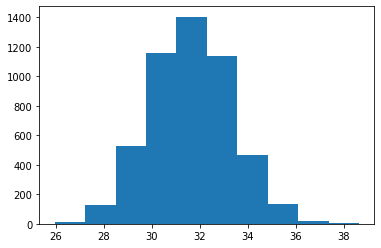

In [46]:
plt.hist(promedios)

In [47]:
promedios= pd.Series(promedios)

In [48]:
promedios.mean()

31.63700999999993

In [49]:
lower_boundary = promedios.mean() - 1.96 * promedios.std()
upper_boundary = promedios.mean() + 1.96 * promedios.std()

In [50]:
lower_boundary

28.323863613777572

In [51]:
upper_boundary

34.95015638622228

{'whiskers': [<matplotlib.lines.Line2D at 0x20e11cbdd68>,
 'caps': [<matplotlib.lines.Line2D at 0x20e11f194a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e11cbd978>],
 'medians': [<matplotlib.lines.Line2D at 0x20e11f19b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e11f19e80>],
 'means': []}

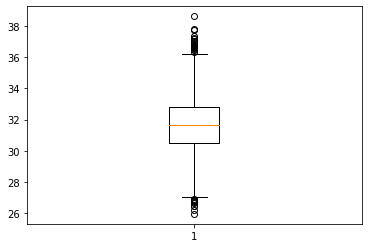

In [52]:
plt.boxplot(promedios)

In [53]:
data_si_hubo = conteo_fechas.loc[conteo_fechas['Hubo Campeonato']==1,'Para Conteo']

n_iterations_si = 5000
n_size_si = int(len(data) * 0.50)

In [54]:
promedios_si=[]

for i in range(n_iterations_si):
    minidatos_si = resample(data_si_hubo, n_samples=n_size_si)
    promedios_si.append(pd.Series(minidatos_si).mean())

(array([   5.,   74.,  360.,  934., 1424., 1284.,  670.,  205.,   41.,
           3.]),
 array([21.5952381 , 22.84904762, 24.10285714, 25.35666667, 26.61047619,
        27.86428571, 29.11809524, 30.37190476, 31.62571429, 32.87952381,
        34.13333333]),
 <a list of 10 Patch objects>)

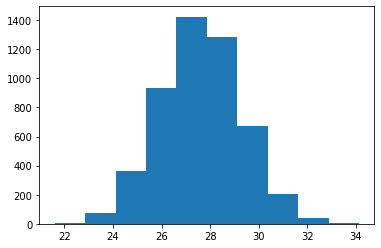

In [55]:
plt.hist(promedios_si)

In [56]:
promedios_si= pd.Series(promedios_si)

In [57]:
lower_boundary_si = promedios_si.mean() - 1.96 * promedios_si.std()
upper_boundary_si = promedios_si.mean() + 1.96 * promedios_si.std()
print(f' Lower boundary of deaths during game day {lower_boundary_si}')
print(f' High boundary of deaths during game day {upper_boundary_si}')

 Lower boundary of deaths during game day 24.353677312365882
 High boundary of deaths during game day 30.875439830491196


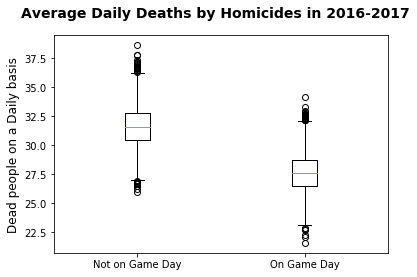

In [87]:
fig, ax = plt.subplots()

fig.suptitle("Average Daily Deaths by Homicides in 2016-2017",
             fontsize=14, fontweight="bold")

fig = plt.boxplot([promedios, promedios_si])

tick_labels = ["Not on Game Day", "On Game Day"]
ax.set_xticklabels(tick_labels)

ax.set_ylabel("Dead people on a Daily basis",fontsize=12)
plt.savefig("./Image Outputs/Average Daily Deaths by Homicides.png", bbox_inches='tight')

In [59]:
print("Cuando si hay partido")
print(lower_boundary_si)
print(upper_boundary_si)

print("Cuando no hay partido")
print(lower_boundary)
print(upper_boundary)

Cuando si hay partido
24.353677312365882
30.875439830491196
Cuando no hay partido
28.323863613777572
34.95015638622228


## Analisis de Defunciones por Accidente de Transito

In [61]:
defunciones_DB_light.head(3)

,ENT_REGIS,SEXO,DIA_OCURR,MES_OCURR,ANIO_OCUR,GR_LISMEX,EDAD_AGRU,Date Registered,WeekDay,WeekDay as Str,Hubo Campeonato,Estado,Grupo de Edad,Genero_Sexo
0,1,2,26,7,1994,30,18,1994-07-26,1,Tuesday,0,Aguascalientes,De 65 a 69 años,Mujeres
1,1,2,10,11,2011,30,23,2011-11-10,3,Thursday,0,Aguascalientes,De 90 a 94 años,Mujeres
2,1,1,12,2,2011,20,22,2011-02-12,5,Saturday,0,Aguascalientes,De 85 a 89 años,Hombres


In [62]:
defunciones_CLEAN_auto = defunciones_DB_light.copy()
defunciones_CLEAN_auto = defunciones_CLEAN_auto[['Genero_Sexo','Estado','Grupo de Edad', 'GR_LISMEX', 'Date Registered', 'WeekDay as Str', 'Hubo Campeonato']]
defunciones_CLEAN_auto["Para Conteo"] = 1
defunciones_CLEAN_auto.head(3)

,Genero_Sexo,Estado,Grupo de Edad,GR_LISMEX,Date Registered,WeekDay as Str,Hubo Campeonato,Para Conteo
0,Mujeres,Aguascalientes,De 65 a 69 años,30,1994-07-26,Tuesday,0,1
1,Mujeres,Aguascalientes,De 90 a 94 años,30,2011-11-10,Thursday,0,1
2,Hombres,Aguascalientes,De 85 a 89 años,20,2011-02-12,Saturday,0,1


In [63]:
# Para hacer los filtros por Tipo de Defunción
##### E49 Accidentes de transporte

defunciones_CLEAN_auto.drop(defunciones_CLEAN_auto.index[defunciones_CLEAN_auto["GR_LISMEX"] != "E49"], inplace=True)
defunciones_CLEAN_auto.head()

,Genero_Sexo,Estado,Grupo de Edad,GR_LISMEX,Date Registered,WeekDay as Str,Hubo Campeonato,Para Conteo
70,Hombres,Aguascalientes,De 25 a 29 años,E49,2017-02-11,Saturday,1,1
93,Hombres,Aguascalientes,De 50 a 54 años,E49,2017-02-12,Sunday,1,1
115,Mujeres,Aguascalientes,De 20 a 24 años,E49,2017-02-12,Sunday,1,1
119,Hombres,Aguascalientes,De 65 a 69 años,E49,2017-02-13,Monday,0,1
129,Hombres,Aguascalientes,De 20 a 24 años,E49,2017-02-15,Wednesday,0,1


In [64]:
def1617_auto= defunciones_CLEAN_auto[(defunciones_CLEAN_auto['Date Registered'] >= '2016-1-1 00:00:00') & (defunciones_CLEAN_auto['Date Registered'] <= '2017-12-31 00:00:00')]
def1617_auto.head()

,Genero_Sexo,Estado,Grupo de Edad,GR_LISMEX,Date Registered,WeekDay as Str,Hubo Campeonato,Para Conteo
70,Hombres,Aguascalientes,De 25 a 29 años,E49,2017-02-11,Saturday,1,1
93,Hombres,Aguascalientes,De 50 a 54 años,E49,2017-02-12,Sunday,1,1
115,Mujeres,Aguascalientes,De 20 a 24 años,E49,2017-02-12,Sunday,1,1
119,Hombres,Aguascalientes,De 65 a 69 años,E49,2017-02-13,Monday,0,1
129,Hombres,Aguascalientes,De 20 a 24 años,E49,2017-02-15,Wednesday,0,1


In [65]:
def_fechas_auto = pd.DataFrame(def1617_auto.groupby(["Date Registered", "Hubo Campeonato", "WeekDay as Str", "Genero_Sexo"]).sum()["Para Conteo"])
def_fechas_auto.head()

,,,,Para Conteo
Date Registered,Hubo Campeonato,WeekDay as Str,Genero_Sexo,
2016-01-07,0,Thursday,Hombres,1
2016-01-15,0,Friday,Hombres,2
2016-01-17,0,Sunday,Hombres,1
2016-02-12,0,Friday,Hombres,1
2016-02-14,0,Sunday,Hombres,1


In [66]:
conteo_fechas_auto = def_fechas_auto.reset_index(drop=False)
conteo_fechas_auto.head()

,Date Registered,Hubo Campeonato,WeekDay as Str,Genero_Sexo,Para Conteo
0,2016-01-07,0,Thursday,Hombres,1
1,2016-01-15,0,Friday,Hombres,2
2,2016-01-17,0,Sunday,Hombres,1
3,2016-02-12,0,Friday,Hombres,1
4,2016-02-14,0,Sunday,Hombres,1


In [67]:
data_auto_no = conteo_fechas_auto.loc[conteo_fechas_auto['Hubo Campeonato']==0,'Para Conteo']

n_iterations_auto_no = 5000
n_size_auto_no = int(len(data_auto_no) * 0.50)

In [68]:
promedios_auto_no=[]

for i in range(n_iterations_auto_no):
    minidatos_auto_no = resample(data_auto_no, n_samples=n_size_auto_no)
    promedios_auto_no.append(pd.Series(minidatos_auto_no).mean())

(array([   7.,   62.,  237.,  619., 1226., 1299.,  996.,  398.,  134.,
          22.]),
 array([15.70689655, 16.30057471, 16.89425287, 17.48793103, 18.0816092 ,
        18.67528736, 19.26896552, 19.86264368, 20.45632184, 21.05      ,
        21.64367816]),
 <a list of 10 Patch objects>)

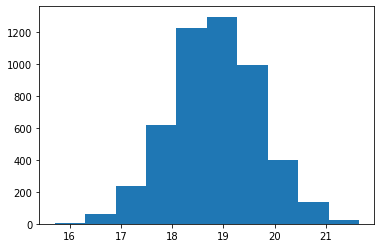

In [69]:
plt.hist(promedios_auto_no)

In [70]:
promedios_auto_no= pd.Series(promedios_auto_no)

In [71]:
lower_boundary_auto_no = promedios_auto_no.mean() - 1.96 * promedios_auto_no.std()
upper_boundary_auto_no = promedios_auto_no.mean() + 1.96 * promedios_auto_no.std()

{'whiskers': [<matplotlib.lines.Line2D at 0x20e1a1b9c88>,
 'caps': [<matplotlib.lines.Line2D at 0x20e1a1b9f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e1a1b9898>],
 'medians': [<matplotlib.lines.Line2D at 0x20e1a1c99b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e1a1c9cf8>],
 'means': []}

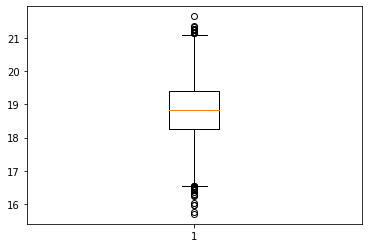

In [72]:
plt.boxplot(promedios_auto_no)

In [73]:
data_auto_si = conteo_fechas_auto.loc[conteo_fechas_auto['Hubo Campeonato']==1,'Para Conteo']

n_iterations_auto_si = 5000
n_size_auto_si = int(len(data_auto_si) * 0.50)

In [74]:
promedios_auto_si=[]

for i in range(n_iterations_auto_si):
    minidatos_auto_si = resample(data_auto_si, n_samples=n_size_auto_si)
    promedios_auto_si.append(pd.Series(minidatos_auto_si).mean())

(array([  10.,   82.,  384., 1057., 1454., 1162.,  611.,  202.,   28.,
          10.]),
 array([14.06944444, 15.90833333, 17.74722222, 19.58611111, 21.425     ,
        23.26388889, 25.10277778, 26.94166667, 28.78055556, 30.61944444,
        32.45833333]),
 <a list of 10 Patch objects>)

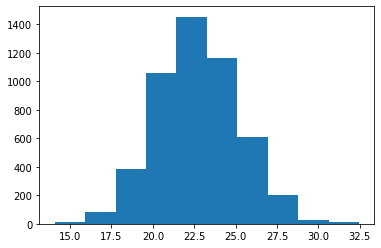

In [75]:
plt.hist(promedios_auto_si)

In [76]:
promedios_auto_si= pd.Series(promedios_auto_si)

In [77]:
lower_boundary_auto_si = promedios_auto_si.mean() - 1.96 * promedios_auto_si.std()
upper_boundary_auto_si = promedios_auto_si.mean() + 1.96 * promedios_auto_si.std()

{'whiskers': [<matplotlib.lines.Line2D at 0x20e1a2a65f8>,
 'caps': [<matplotlib.lines.Line2D at 0x20e1a2a6c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e1a2a6208>],
 'medians': [<matplotlib.lines.Line2D at 0x20e1a2a6f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e1a2b16a0>],
 'means': []}

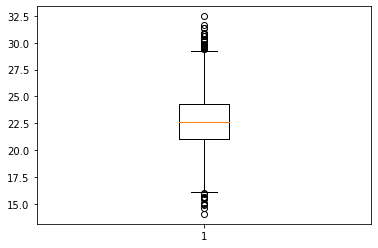

In [78]:
plt.boxplot(promedios_auto_si)

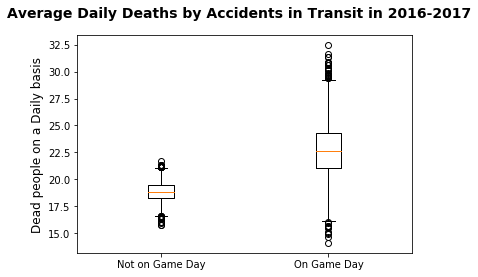

In [86]:
fig, ax = plt.subplots()

fig.suptitle("Average Daily Deaths by Accidents in Transit in 2016-2017",
             fontsize=14, fontweight="bold")

fig = plt.boxplot([promedios_auto_no, promedios_auto_si])

tick_labels = ["Not on Game Day", "On Game Day"]
ax.set_xticklabels(tick_labels)

ax.set_ylabel("Dead people on a Daily basis",fontsize=12)

plt.savefig("./Image Outputs/Average Daily Deaths by Transit Accidents.png",bbox_inches='tight')

In [80]:
print("Cuando si hay partido")
print(lower_boundary_auto_si)
print(upper_boundary_auto_si)

print("Cuando no hay partido")
print(lower_boundary_auto_no)
print(upper_boundary_auto_no)

Cuando si hay partido
17.90194127832101
27.539280943901105
Cuando no hay partido
17.148052297686043
20.51297069081965
